In [63]:
#Import data
import pandas as pd
file = "binary"
file = "three"
# file = "five"
method = "FA"
reduced = ""
# reduced = "(reduced)"

DATAFILE = "./prepared_data/join_"+file+"_scale.csv"
file = file + reduced
Purchase_DF = pd.read_csv(DATAFILE)
print(list(Purchase_DF))
# Purchase_DF

['mean_unexpcost', 'median_unexpcost', 'mean_stdcost', 'median_stdcost', 'mean_pocost', 'median_pocost', 'mean_qty', 'median_qty', 'mean_costsave', 'median_costsave', 'mean_spend', 'median_spend', 'mean_return_spend', 'median_return_spend', 'mean_leadtime', 'median_leadtime', 'mean_abc', 'median_abc', 'mean_source', 'median_source', 'Category', 'mean_late', 'median_late', 'mean_early', 'median_early', '%Critical', 'SupplierID', 'quality_risk_mean', 'quality_risk_median', 'delivery_risk_mean', 'delivery_risk_median']


In [64]:
#Select features
feats = ['mean_unexpcost', 'mean_return_spend', 'mean_qty', 'mean_costsave', 'mean_spend',
             'mean_leadtime','mean_abc', 'mean_source',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
if(reduced != ""):
    feats = ['mean_unexpcost', 'mean_return_spend','mean_spend',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
    print(feats)
Purch_PCA = Purchase_DF[feats]
Purch_PCA = Purch_PCA.dropna()

x = Purch_PCA
X = Purch_PCA.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import FactorAnalysis as FA

In [66]:
#Scree Plots
fa = FA().fit(x)
m = fa.components_
n = fa.noise_variance_
m1 = m**2
m2 = np.sum(m1,axis=1)
comp1 = [(100*m2[i])/np.sum(m2) for i in range(6)]
comp2 = [(100*m2[i])/(np.sum(m2)+np.sum(n)) for i in range(6)]

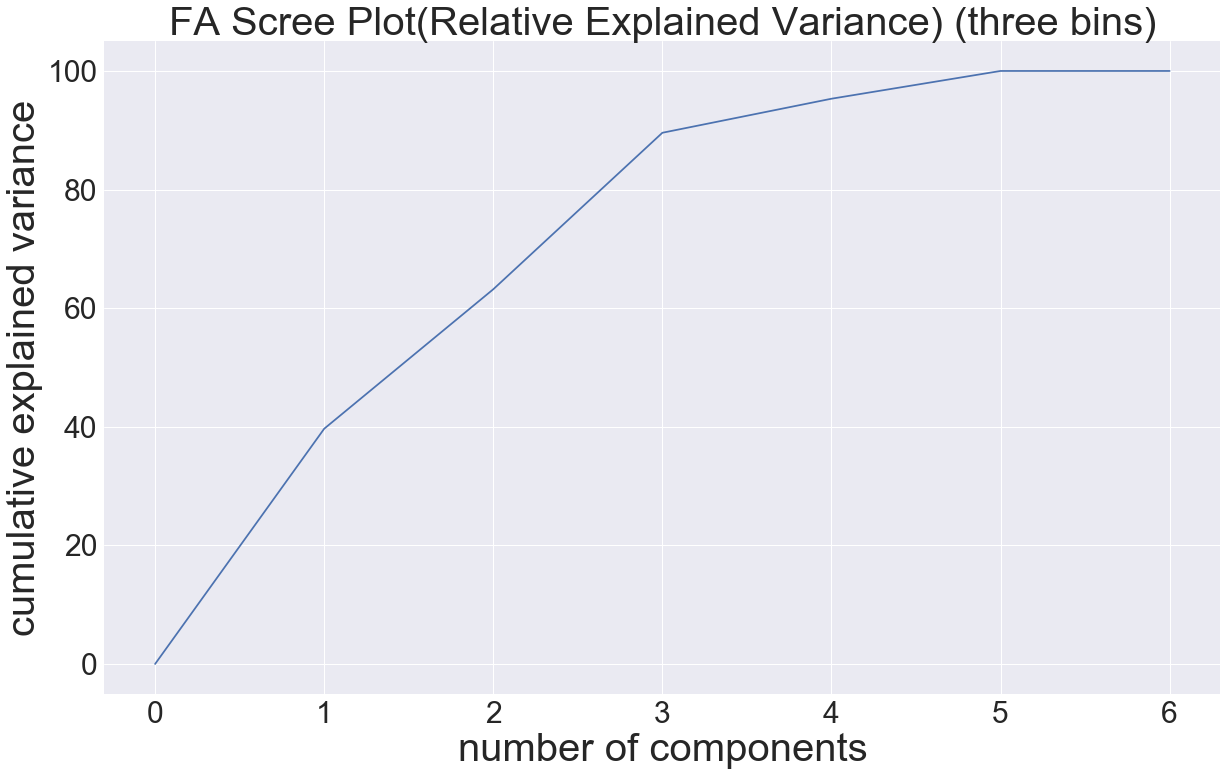

In [67]:
plt.figure(figsize=(20,12))
plt.xlabel('number of components', fontsize=40)
plt.ylabel('cumulative explained variance', fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)

plt.plot(np.insert(np.cumsum(comp1),0,0))

plt.title(method + " Scree Plot(Relative Explained Variance) ("+file+" bins)", fontsize=40)
plt.savefig(method+"_relative_"+file+"_bin_scree_plot")

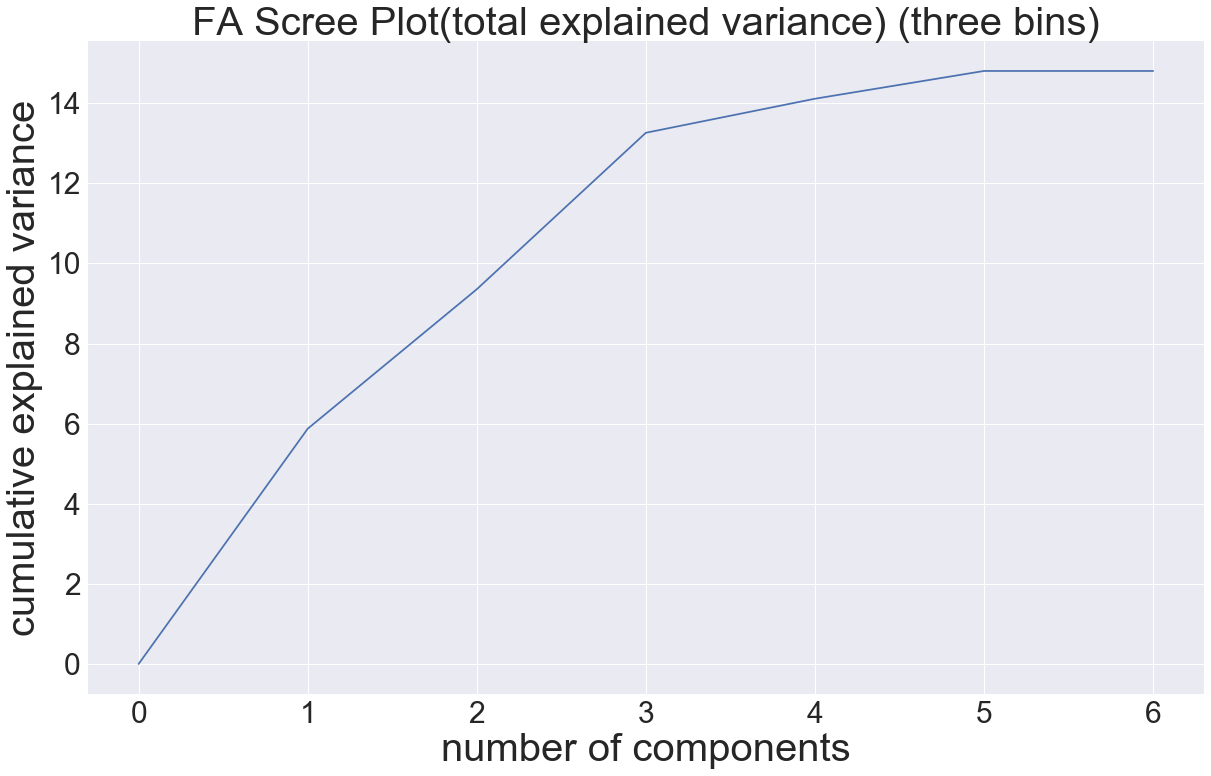

In [68]:
plt.figure(figsize=(20,12))
plt.xlabel('number of components', fontsize=40)
plt.ylabel('cumulative explained variance', fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)

plt.plot(np.insert(np.cumsum(comp2),0,0))

plt.title(method + " Scree Plot(total explained variance) ("+file+" bins)", fontsize=40)
plt.savefig(method+"_total_"+file+"_bin_scree_plot")

In [69]:
#Run
pca = FA(n_components = 6)
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(578, 13)
(578, 6)


In [70]:
#Begin plotting Components
comp = pca.components_
comp

array([[-3.99431372e-02,  2.59964665e-02, -3.94930284e-02,
         1.85609443e-03,  2.31818862e-01,  1.45960286e-01,
         3.93379356e-01, -4.51035196e-03, -2.24802227e-03,
         6.15730621e-02,  1.19078147e-01,  5.11334768e-02,
         1.10906306e-01],
       [ 3.87908811e-02,  1.03863748e-02, -1.16699670e-01,
         1.66767994e-02, -1.05594433e-01, -5.06782233e-02,
        -1.70608806e-01, -1.72092019e-02,  2.96006630e-03,
        -4.73210056e-03,  3.38112888e-02,  1.03486539e-01,
         2.86941857e-01],
       [ 2.28995347e-01,  1.00816060e-03, -6.55924145e-02,
         1.57706793e-01,  3.69268961e-02,  9.30096672e-03,
         2.20239478e-02,  2.27314607e-01, -1.02559569e-03,
         4.27171872e-02,  3.76104219e-02, -3.05495507e-04,
        -5.44023458e-02],
       [ 4.10537957e-02, -6.82715369e-03,  1.51324729e-01,
         4.05104962e-02,  2.24547834e-02,  8.35975163e-03,
         1.12338934e-01,  5.57269377e-02,  1.26243183e-02,
        -1.61341324e-01,  1.35583177e

In [71]:
#Setparams for Components
uncost = [i[0] for i in comp]
max0 = [i[0] if i[0]>=0 else 0 for i in comp]
min0 = [i[0] if i[0]<0 else 0 for i in comp]
# print(uncost)
# print(max0)
# print(min0)
ret = [i[1] for i in comp]
max1 = [i[1]+max0[q] if i[1]>=0 else max0[q] for q,i in zip(list(range(0, 12)), comp)]
min1 = [i[1]+min0[q] if i[1]<0 else min0[q] for q,i in zip(list(range(0, 12)), comp)]
minret = [max0[q] if i>=0 else min0[q] for q,i in zip(list(range(0, 12)),ret)]
# print(ret)
# print(max1)
# print(min1)
# print(minret)
qty = [i[2] for i in comp]
max2 = [i[2]+max1[q] if i[2]>=0 else max1[q] for q,i in zip(list(range(0, 12)), comp)]
min2 = [i[2]+min1[q] if i[2]<0 else min1[q] for q,i in zip(list(range(0, 12)), comp)]
minqty = [max1[q] if i>=0 else min1[q] for q,i in zip(list(range(0, 12)),qty)]

costsave = [i[3] for i in comp]
max3 = [i[3]+max2[q] if i[3]>=0 else max2[q] for q,i in zip(list(range(0, 12)), comp)]
min3 = [i[3]+min2[q] if i[3]<0 else min2[q] for q,i in zip(list(range(0, 12)), comp)]
mincostsave = [max2[q] if i>=0 else min2[q] for q,i in zip(list(range(0, 12)),costsave)]

spend = [i[4] for i in comp]
max4 = [i[4]+max3[q] if i[4]>=0 else max3[q] for q,i in zip(list(range(0, 12)), comp)]
min4 = [i[4]+min3[q] if i[4]<0 else min3[q] for q,i in zip(list(range(0, 12)), comp)]
minspend = [max3[q] if i>=0 else min3[q] for q,i in zip(list(range(0, 12)),spend)]

leadtime = [i[5] for i in comp]
max5 = [i[5]+max4[q] if i[5]>=0 else max4[q] for q,i in zip(list(range(0, 12)), comp)]
min5 = [i[5]+min4[q] if i[5]<0 else min4[q] for q,i in zip(list(range(0, 12)), comp)]
minleadtime = [max4[q] if i>=0 else min4[q] for q,i in zip(list(range(0, 12)),leadtime)]

abc = [i[6] for i in comp]
max6 = [i[6]+max5[q] if i[6]>=0 else max5[q] for q,i in zip(list(range(0, 12)), comp)]
min6 = [i[6]+min5[q] if i[6]<0 else min5[q] for q,i in zip(list(range(0, 12)), comp)]
minabc = [max5[q] if i>=0 else min5[q] for q,i in zip(list(range(0, 12)),abc)]

source = [i[7] for i in comp]
max7 = [i[7]+max6[q] if i[7]>=0 else max6[q] for q,i in zip(list(range(0, 12)), comp)]
min7 = [i[7]+min6[q] if i[7]<0 else min6[q] for q,i in zip(list(range(0, 12)), comp)]
minsource = [max6[q] if i>=0 else min6[q] for q,i in zip(list(range(0, 12)),source)]

late = [i[8] for i in comp]
max8 = [i[8]+max7[q] if i[8]>=0 else max7[q] for q,i in zip(list(range(0, 12)), comp)]
min8 = [i[8]+min7[q] if i[8]<0 else min7[q] for q,i in zip(list(range(0, 12)), comp)]
minlate = [max7[q] if i>=0 else min7[q] for q,i in zip(list(range(0, 12)),late)]

early = [i[9] for i in comp]
max9 = [i[9]+max8[q] if i[9]>=0 else max8[q] for q,i in zip(list(range(0, 12)), comp)]
min9 = [i[9]+min8[q] if i[9]<0 else min8[q] for q,i in zip(list(range(0, 12)), comp)]
minearly = [max8[q] if i>=0 else min8[q] for q,i in zip(list(range(0, 12)),early)]

critical = [i[10] for i in comp]
max10 = [i[10]+max9[q] if i[10]>=0 else max9[q] for q,i in zip(list(range(0, 12)), comp)]
min10 = [i[10]+min9[q] if i[10]<0 else min9[q] for q,i in zip(list(range(0, 12)), comp)]
mincritical = [max9[q] if i>=0 else min9[q] for q,i in zip(list(range(0, 12)),critical)]

qualrisk = [i[11] for i in comp]
max11 = [i[11]+max10[q] if i[11]>=0 else max10[q] for q,i in zip(list(range(0, 12)), comp)]
min11 = [i[11]+min10[q] if i[11]<0 else min10[q] for q,i in zip(list(range(0, 12)), comp)]
minqualrisk = [max10[q] if i>=0 else min10[q] for q,i in zip(list(range(0, 12)),qualrisk)]

delrisk = [i[12] for i in comp]
max12 = [i[12]+max11[q] if i[12]>=0 else max11[q] for q,i in zip(list(range(0, 12)), comp)]
min12 = [i[12]+min11[q] if i[12]<0 else min11[q] for q,i in zip(list(range(0, 12)), comp)]
mindelrisk = [max11[q] if i>=0 else min11[q] for q,i in zip(list(range(0, 12)),delrisk)]
##Earlylate
# spend = [i[4] for i in comp]
# max0 = [i[4] if i[4]>=0 else 0 for i in comp]
# min0 = [i[4] if i[4]<0 else 0 for i in comp]

# # early = [i[9] for i in comp]
# # minearly = [max0[q] if i>=0 else min0[q] for q,i in zip(list(range(0, 12)),early)]
# abc = [i[6] for i in comp]
# minabc = [max0[q] if i>=0 else min0[q] for q,i in zip(list(range(0, 12)),abc)]

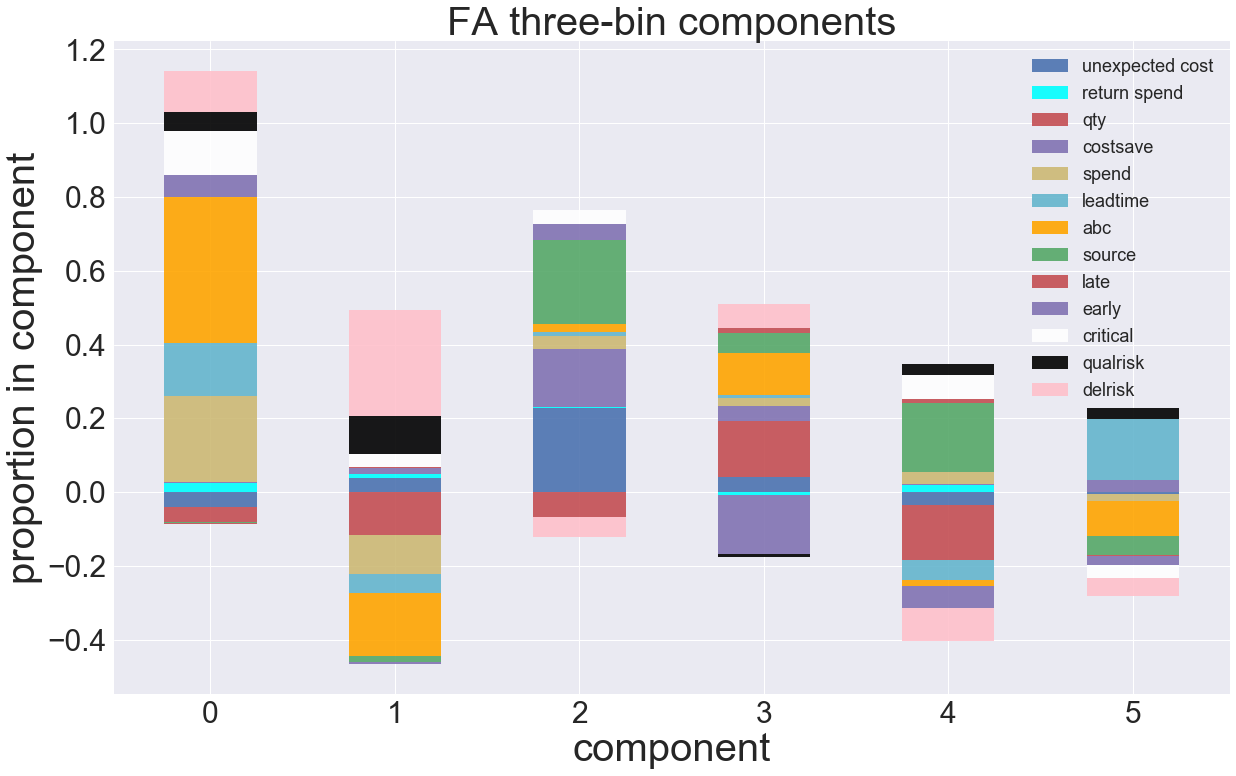

In [75]:
#Plot Components
# PCA_feats = ['mean_unexpcost', 'mean_return', 'mean_qty', 'mean_costsave', 'mean_spend',
#              'mean_leadtime', 'mean_abc', 'mean_source',
#              'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
index = np.arange(6)
error_config = {'ecolor': '0.3'}
bw = 0.5
op=0.9
plt.figure(figsize=(20,12))
# uncost = [i[0] for i in comp]
# ret = [i[1] for i in comp]
# qty = [i[2] for i in comp]
# costsave = [i[3] for i in comp]
rects0 = plt.bar(index, uncost, bw,
                 alpha=op,
                 color='C0',
                 error_kw=error_config,
                 label='unexpected cost')
rects1 = plt.bar(index, ret, bw, bottom=minret,
                 alpha=op,
                 color='cyan',
                 error_kw=error_config,
                 label='return spend')
rects2 = plt.bar(index, qty,bw, bottom=minqty,
                 alpha=op,
                 color='C2',
                 error_kw=error_config,
                 label='qty')
rects3 = plt.bar(index, costsave, bw, bottom=mincostsave,
                 alpha=op,
                 color='C3',
                 error_kw=error_config,
                 label='costsave')
# spend = [i[4] for i in comp]
# leadtime = [i[5] for i in comp]
# abc = [i[6] for i in comp]
rects4 = plt.bar(index, spend, bw, bottom=minspend,
                 alpha=op,
                 color='C4',
                 error_kw=error_config,
                 label='spend')
rects5 = plt.bar(index, leadtime, bw, bottom=minleadtime,
                 alpha=op,
                 color='C5',
                 error_kw=error_config,
                 label='leadtime')
rects6 = plt.bar(index, abc, bw, bottom=minabc,
                 alpha=op,
                 color='orange',
                 error_kw=error_config,
                 label='abc')
# source = [i[7] for i in comp]
# late = [i[8] for i in comp]
# early = [i[9] for i in comp]
rects7 = plt.bar(index, source, bw, bottom=minsource,
                 alpha=op,
                 color='C7',
                 error_kw=error_config,
                 label='source')
rects8 = plt.bar(index, late, bw, bottom=minlate,
                 alpha=op,
                 color='C8',
                 error_kw=error_config,
                 label='late')
rects9 = plt.bar(index, early, bw, bottom=minearly,
                 alpha=op,
                 color='C9',
                 error_kw=error_config,
                 label='early')
# critical = [i[10] for i in comp]
# qualrisk = [i[11] for i in comp]
# delrisk = [i[12] for i in comp]
rects10 = plt.bar(index, critical,bw, bottom=mincritical,
                 alpha=op,
                 color='white',
                 error_kw=error_config,
                 label='critical')
rects11 = plt.bar(index, qualrisk, bw, bottom=minqualrisk,
                 alpha=op,
                 color='k',
                 error_kw=error_config,
                 label='qualrisk')
rects12 = plt.bar(index, delrisk, bw, bottom=mindelrisk,
                 alpha=op,
                 color='pink',
                 error_kw=error_config,
                 label='delrisk')
plt.legend(prop={'size': 18})
plt.xlabel('component', fontsize=40)
plt.ylabel('proportion in component', fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.title(method+" "+file+"-bin components", fontsize=40)
fname = method+"_"+file+"_components"
plt.savefig(fname)
plt.show()

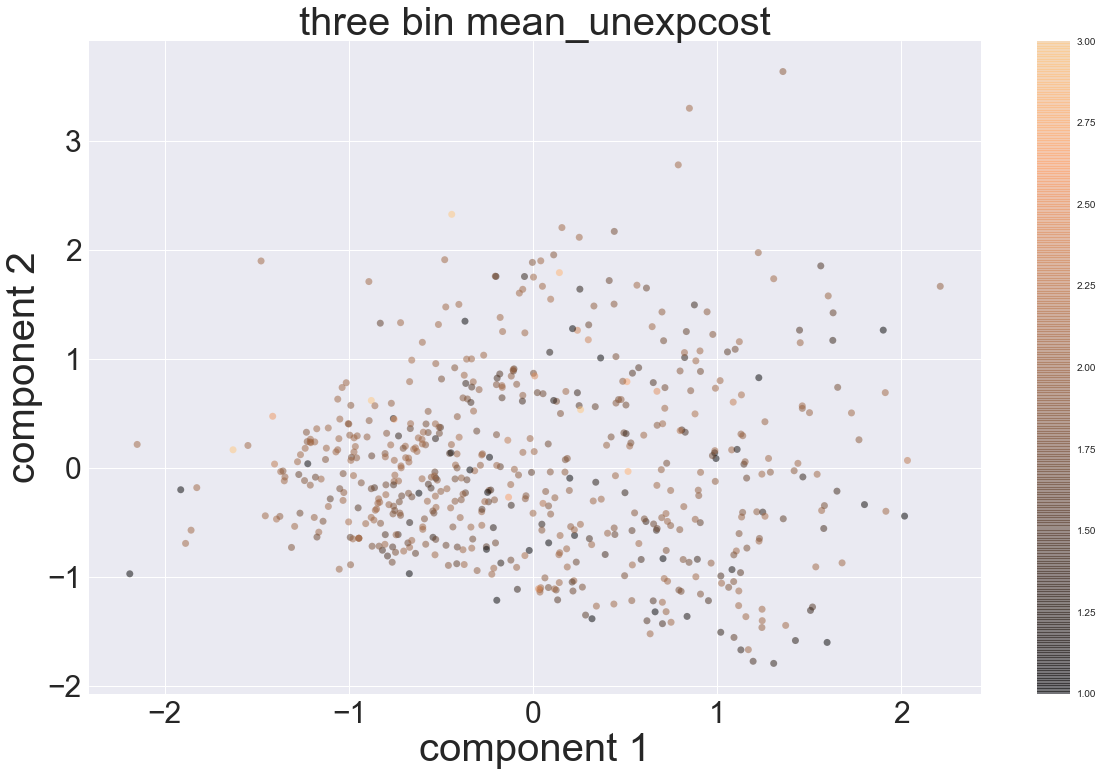

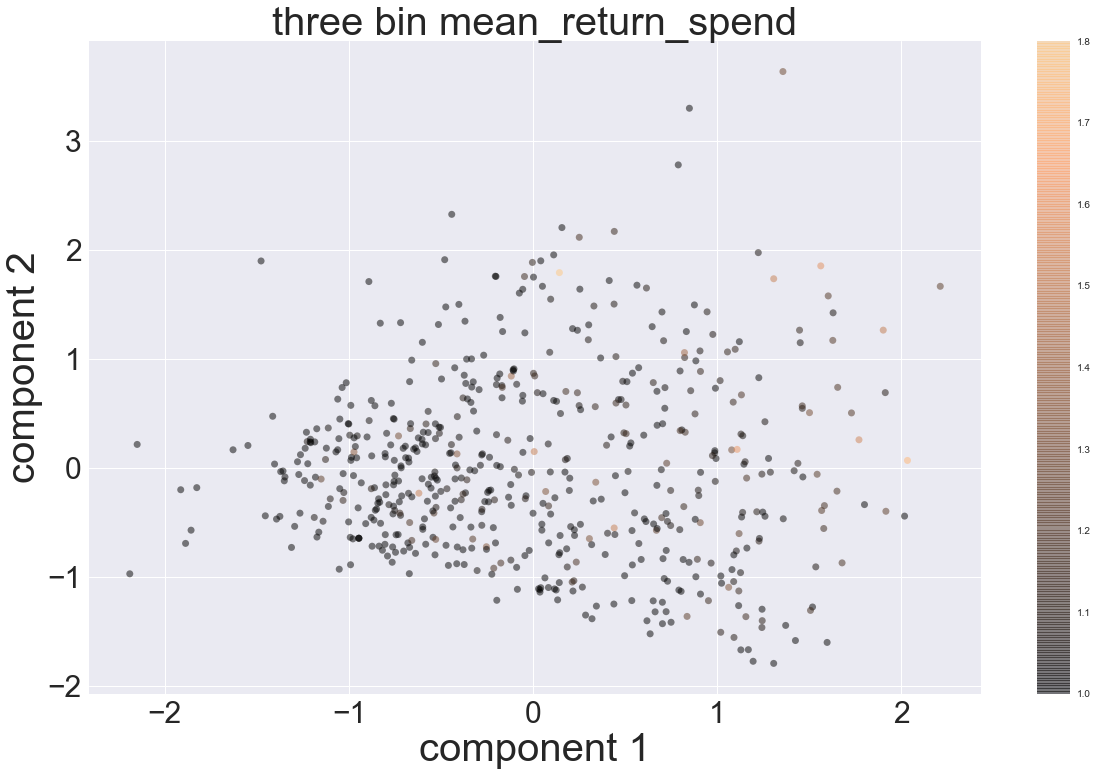

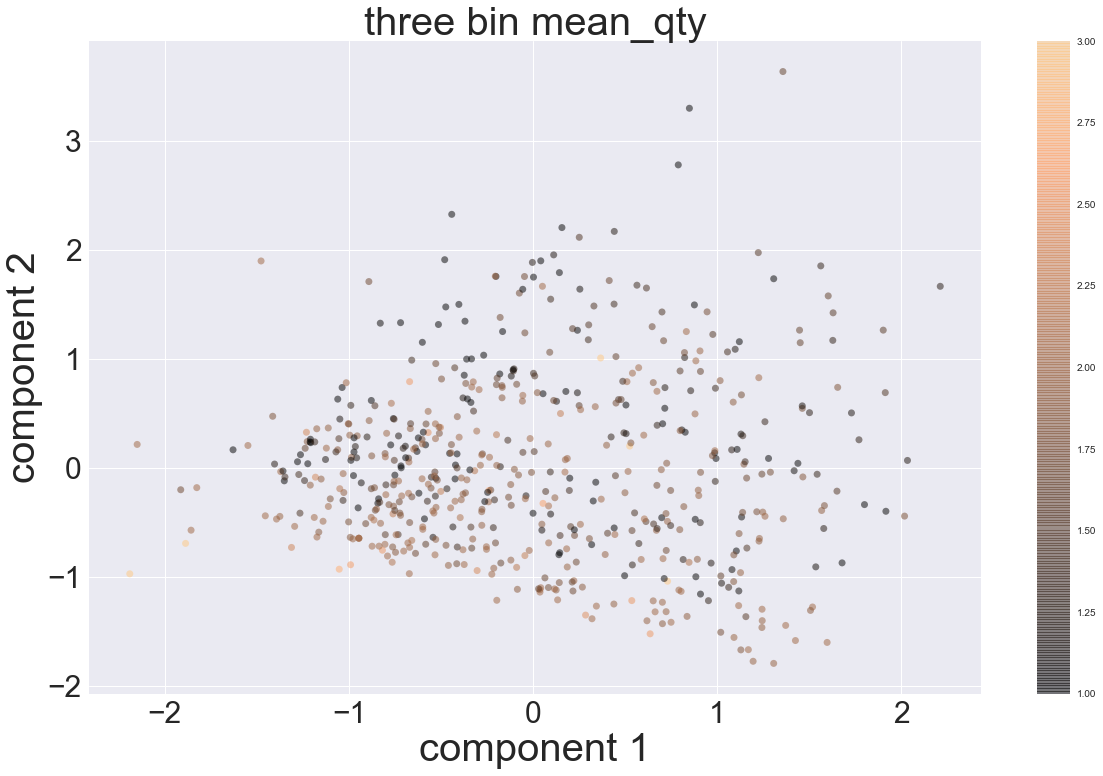

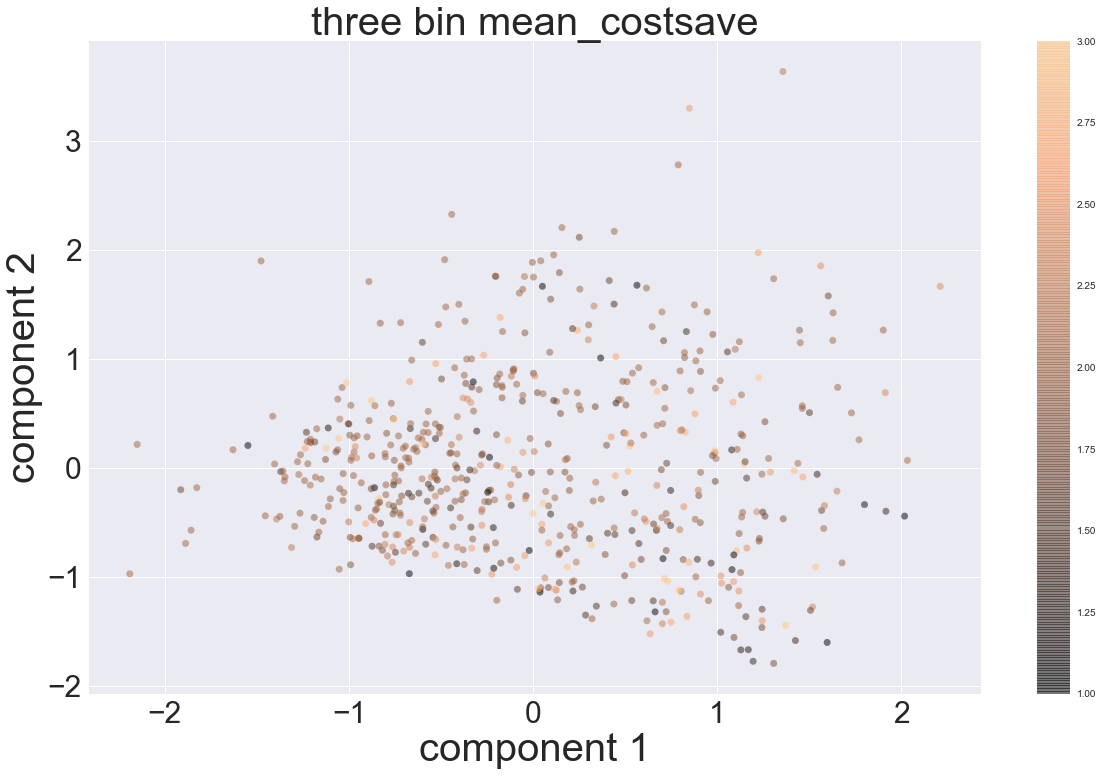

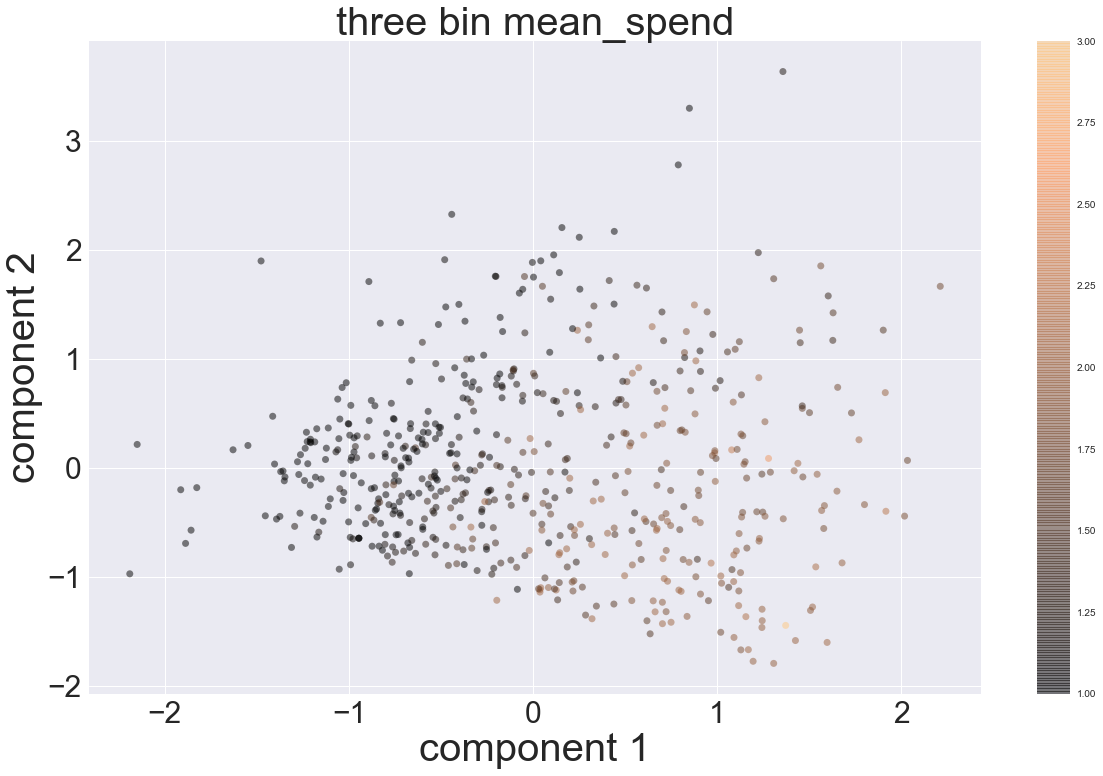

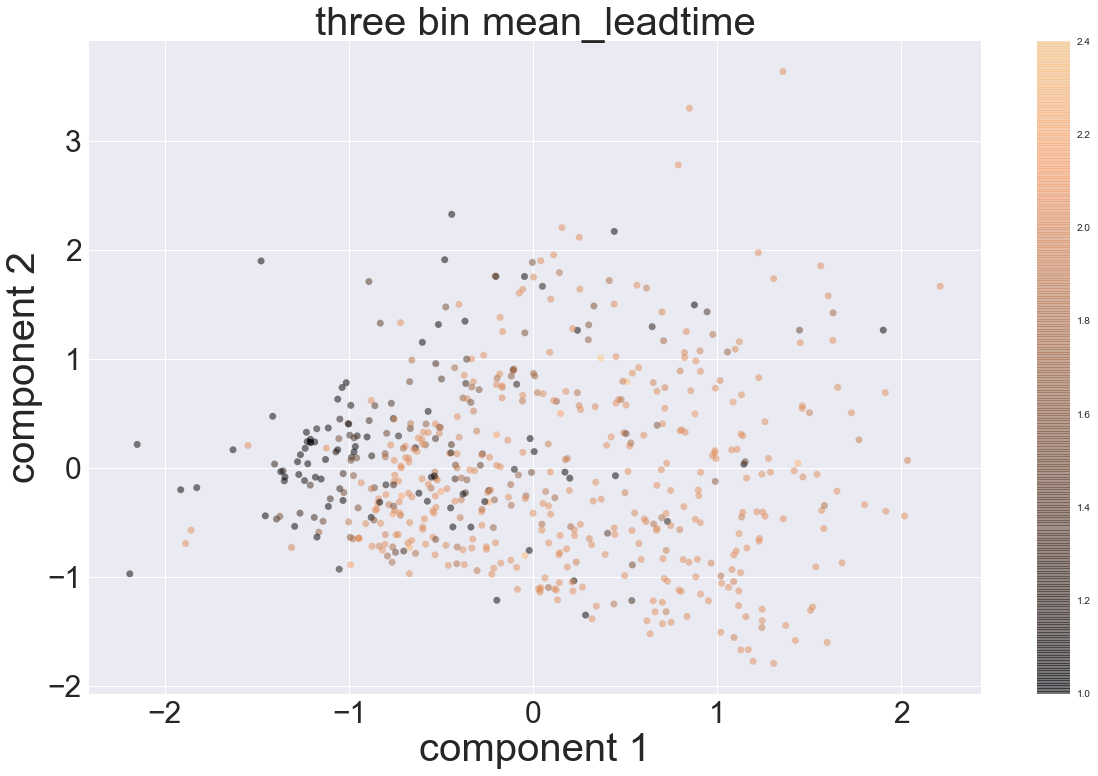

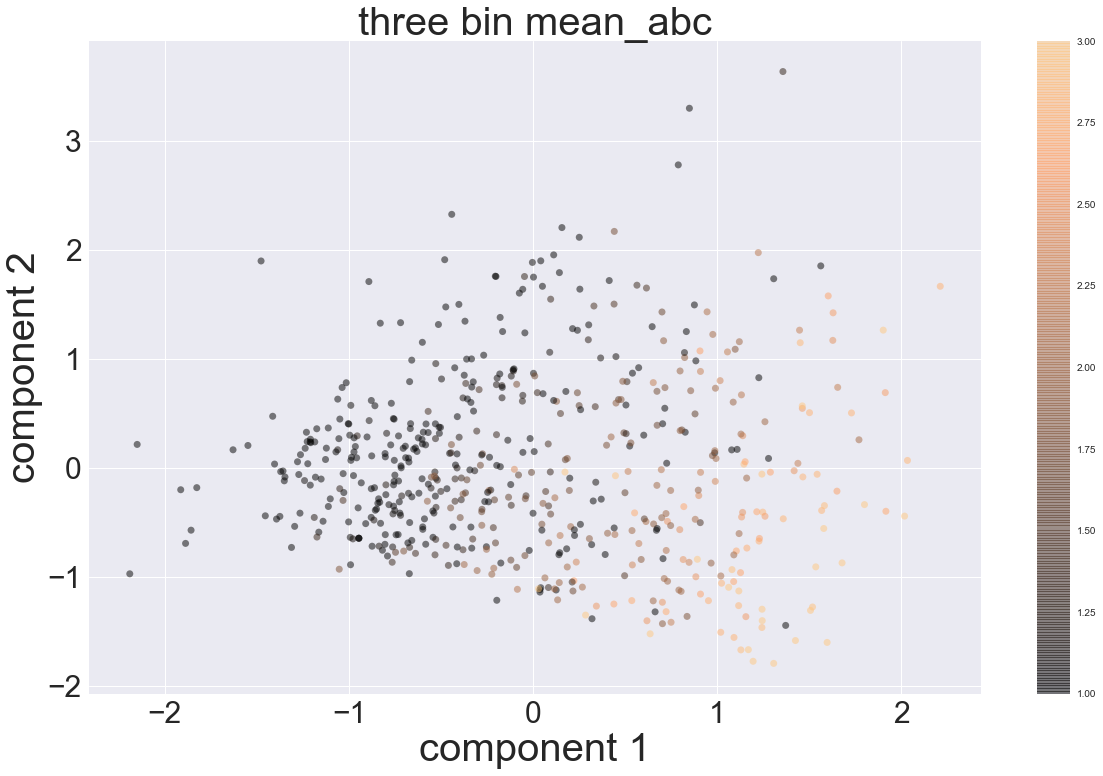

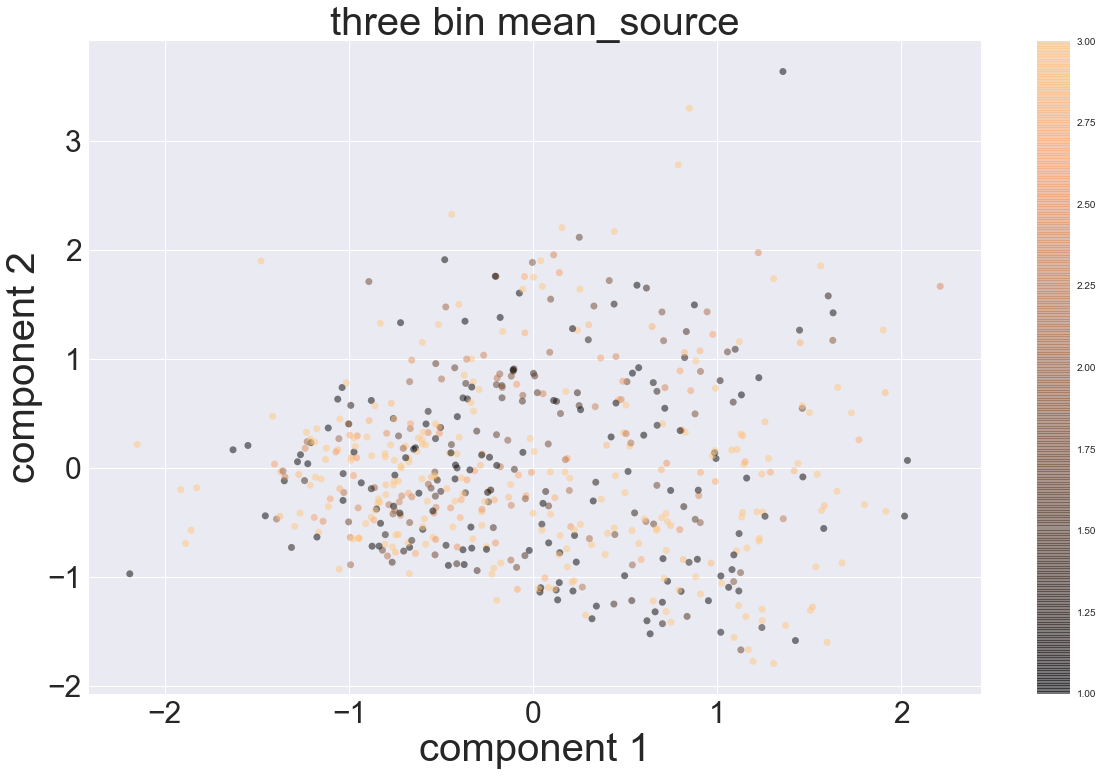

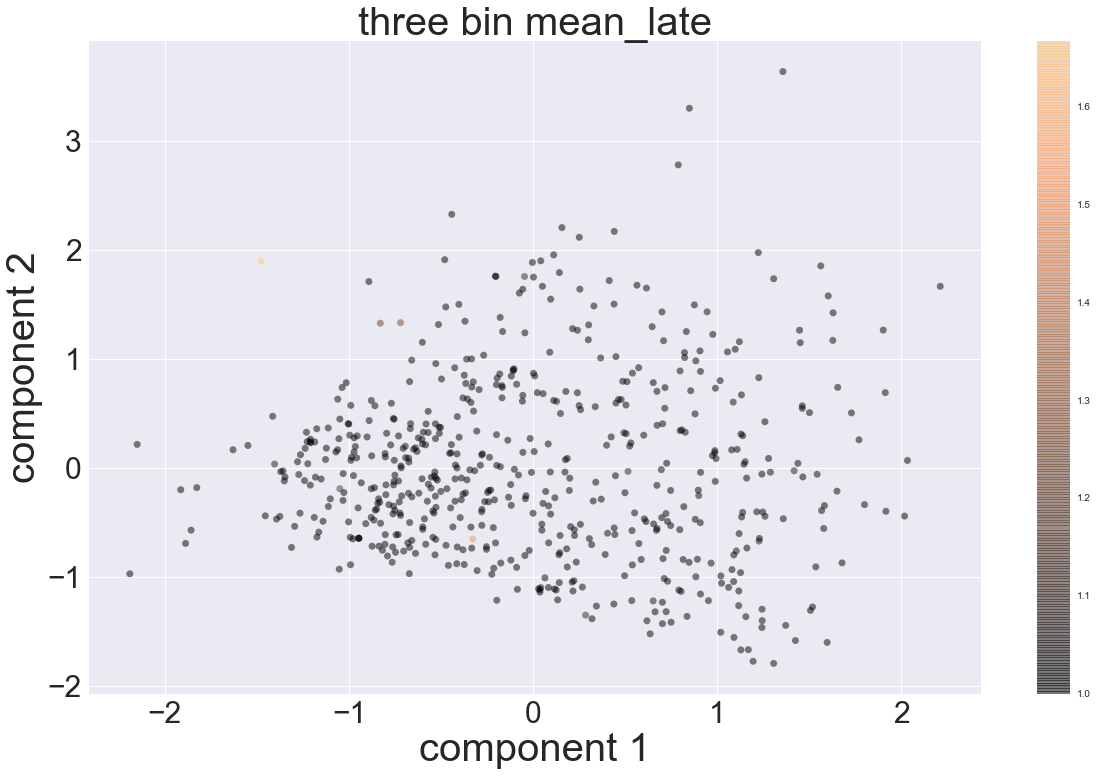

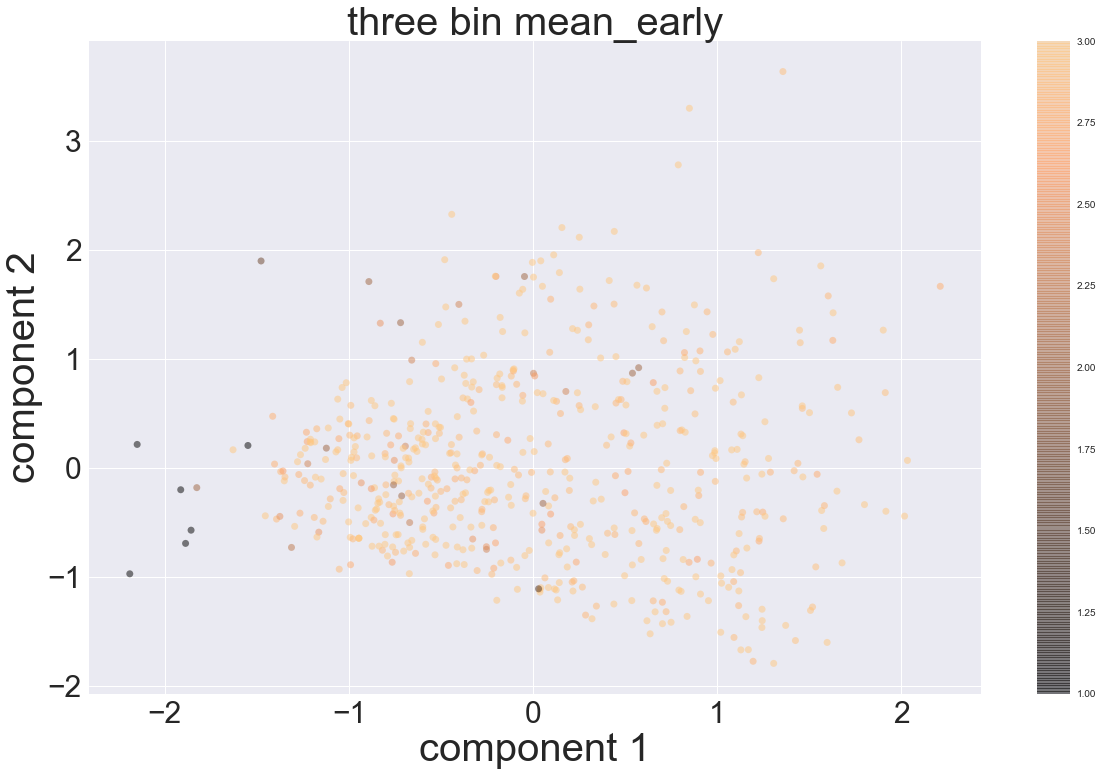

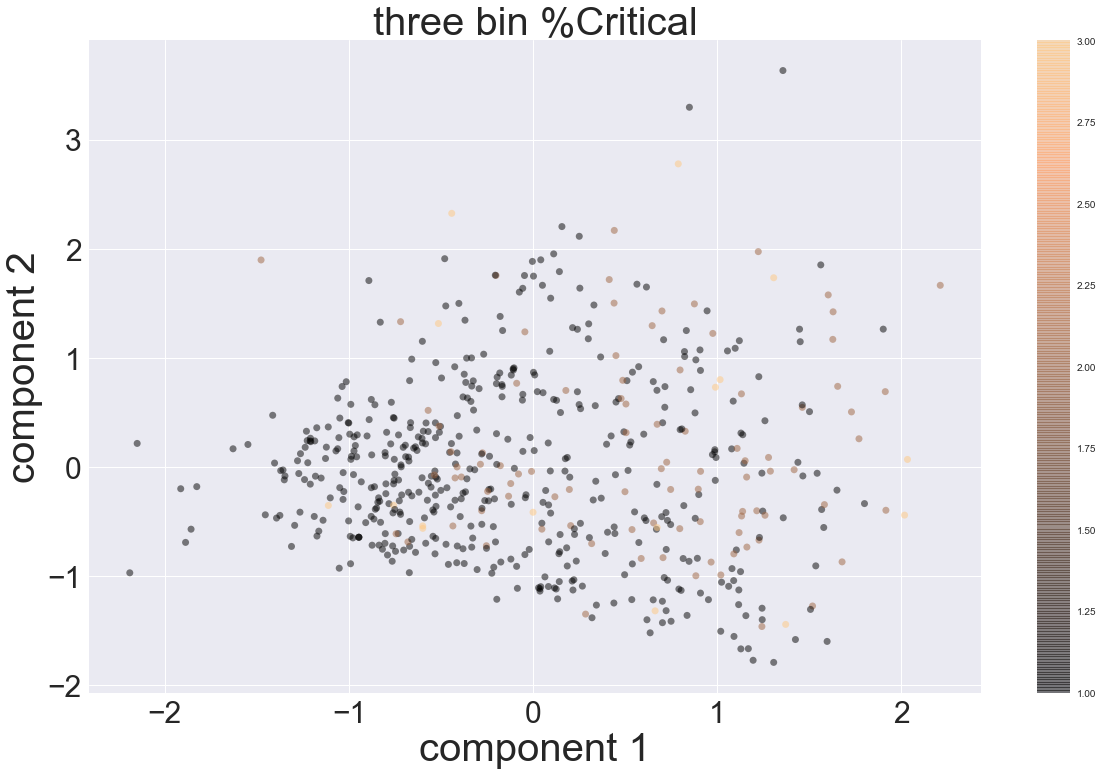

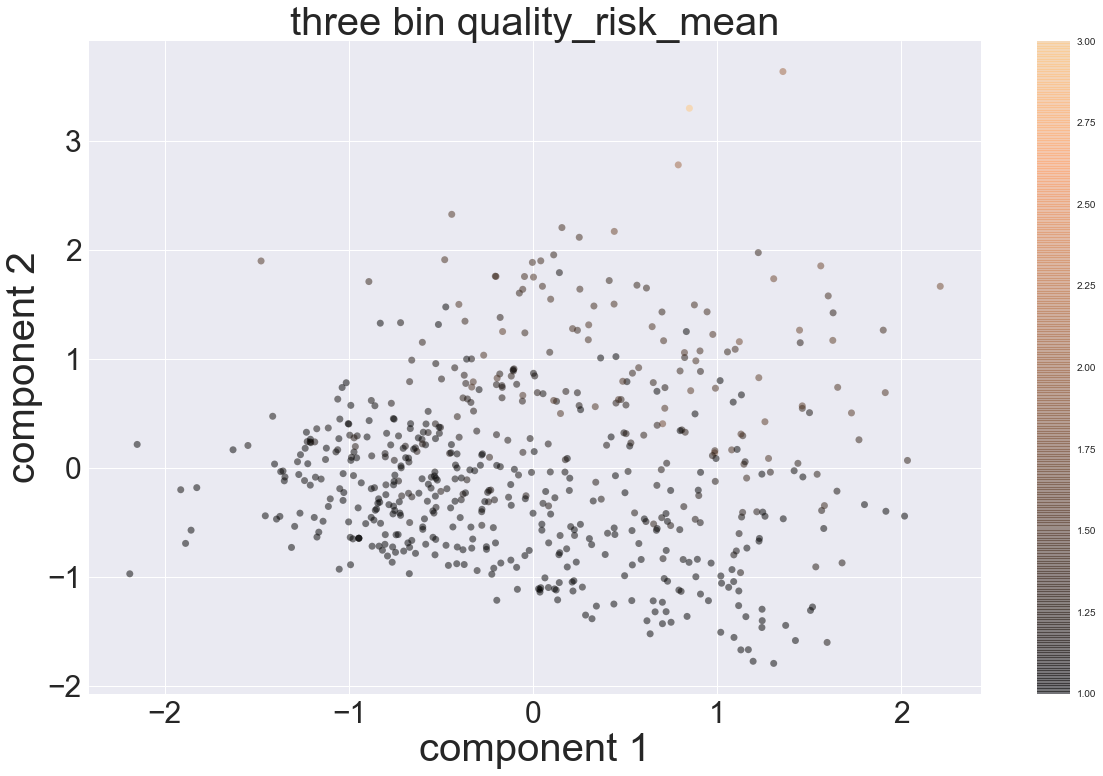

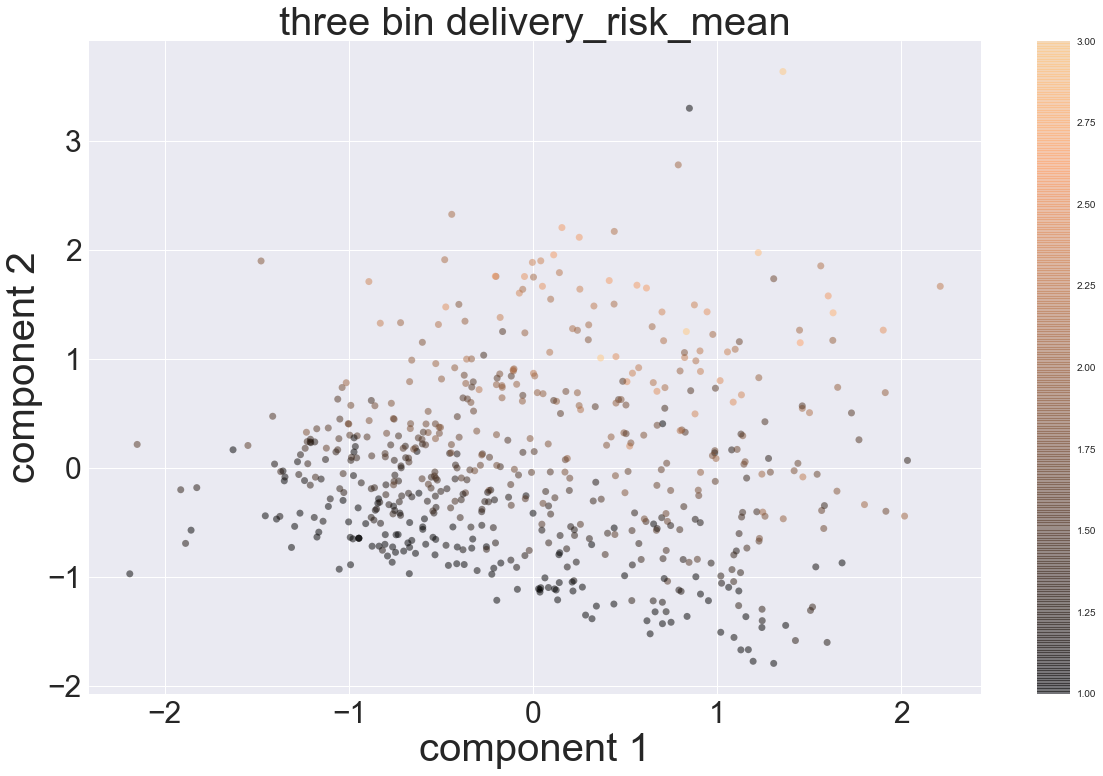

In [79]:
import matplotlib as mpl
import matplotlib.colors as clr
# fig, ax = plt.subplots(figsize=(6, 1))
# fig.subplots_adjust(bottom=0.5)

# cmap = mpl.colors.ListedColormap(['brown', 'cyan'])
# cmap.set_over('0.25')
# cmap.set_under('0.75')
# cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['brown','blue'], N=256)

#plot the components against each feature
for feat in feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 0], projected[:, 1],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap='copper')
    plt.xlabel('component 1', fontsize=40)
    plt.ylabel('component 2', fontsize=40)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.tick_params(axis='both', which='minor', labelsize=30)
    plt.title(file+" bin "+feat, fontsize=40)
    plt.colorbar();
    fname = method+"_"+file+"_1_2_" + feat
#     plt.savefig(fname)
    plt.show()

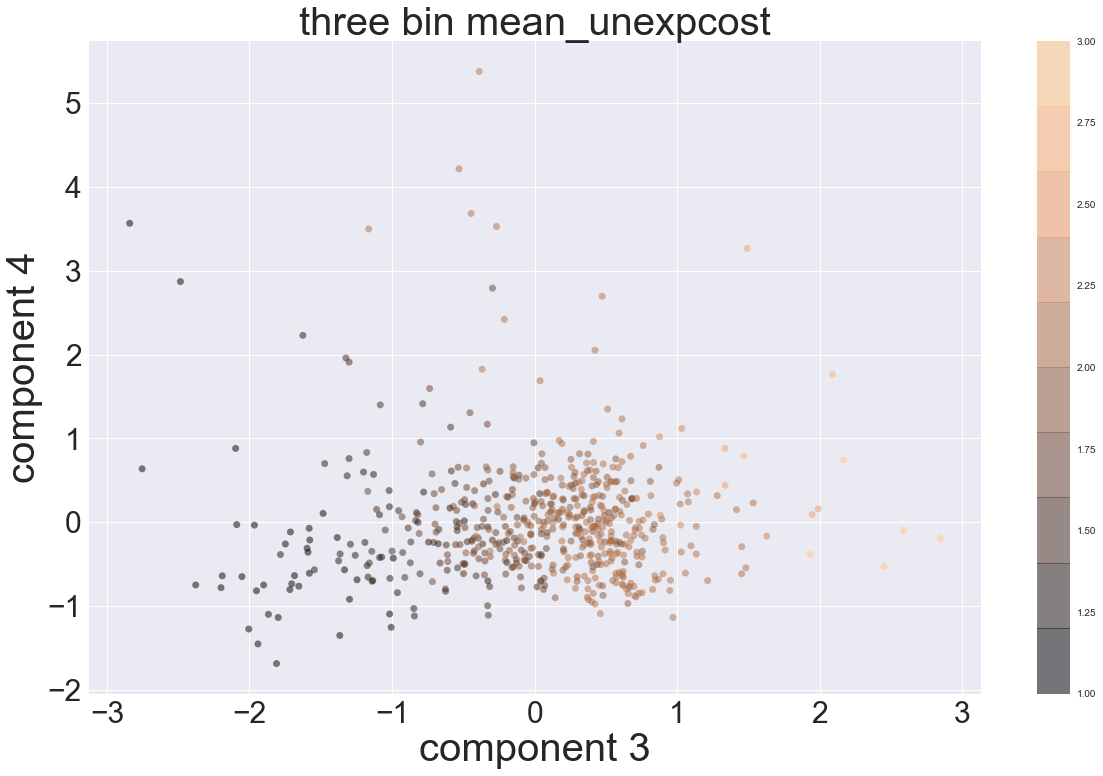

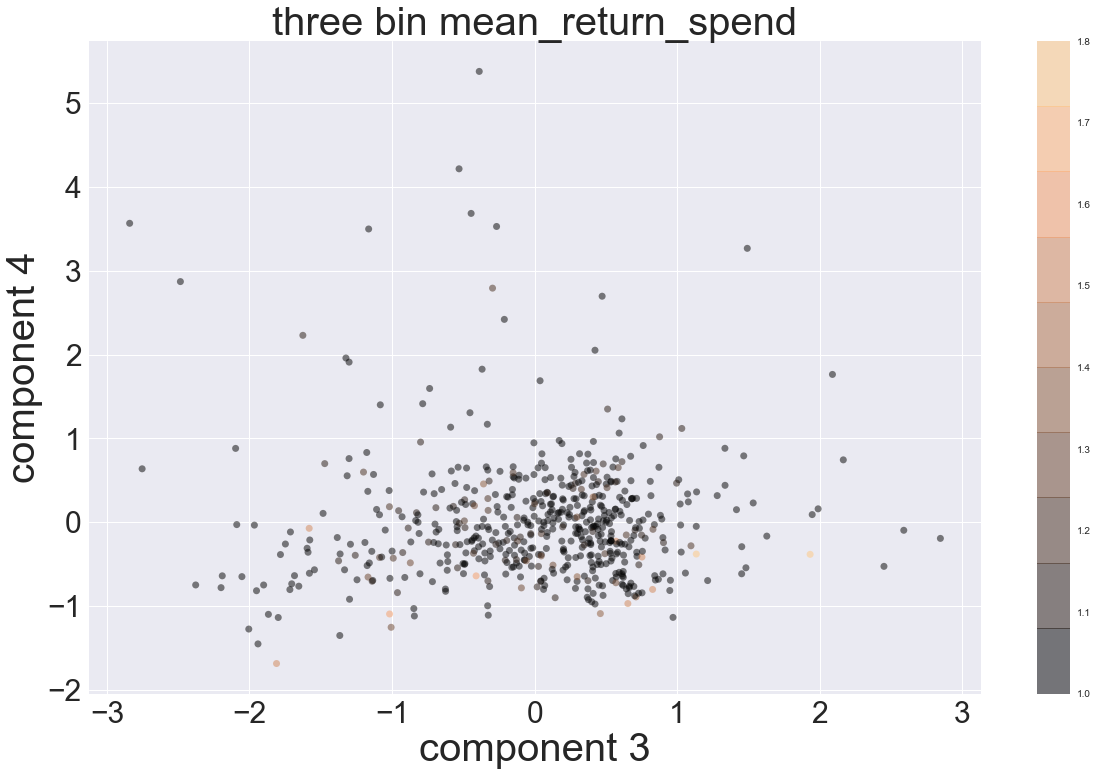

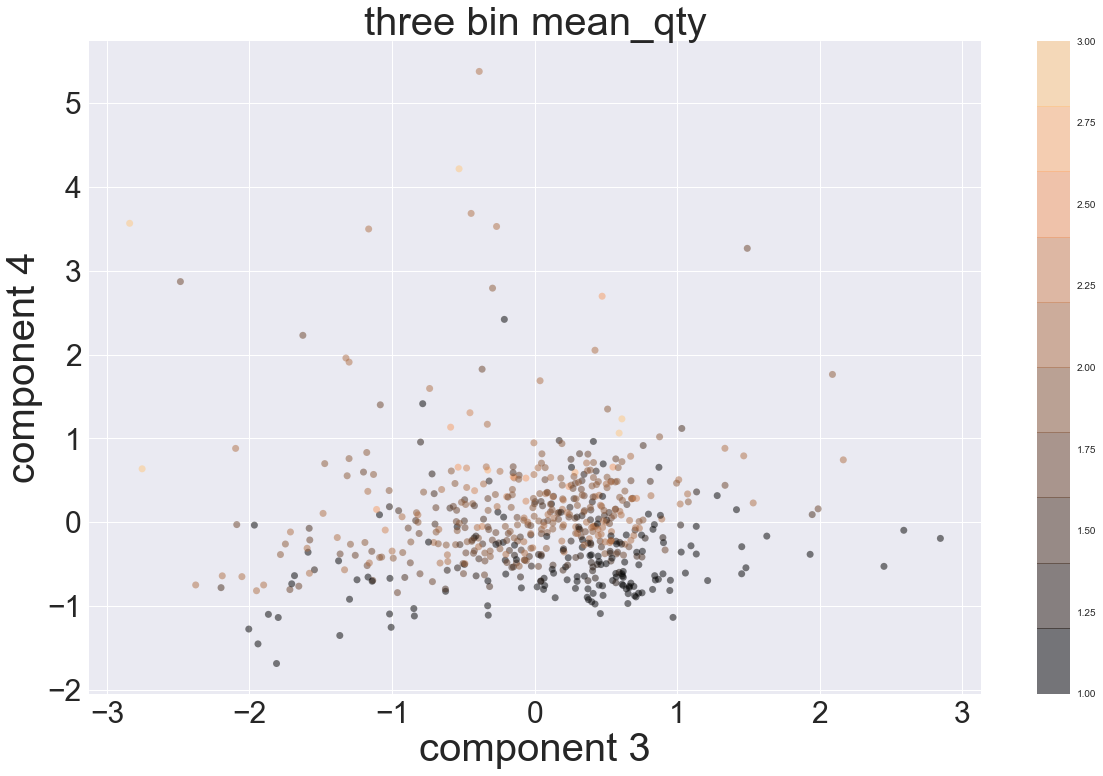

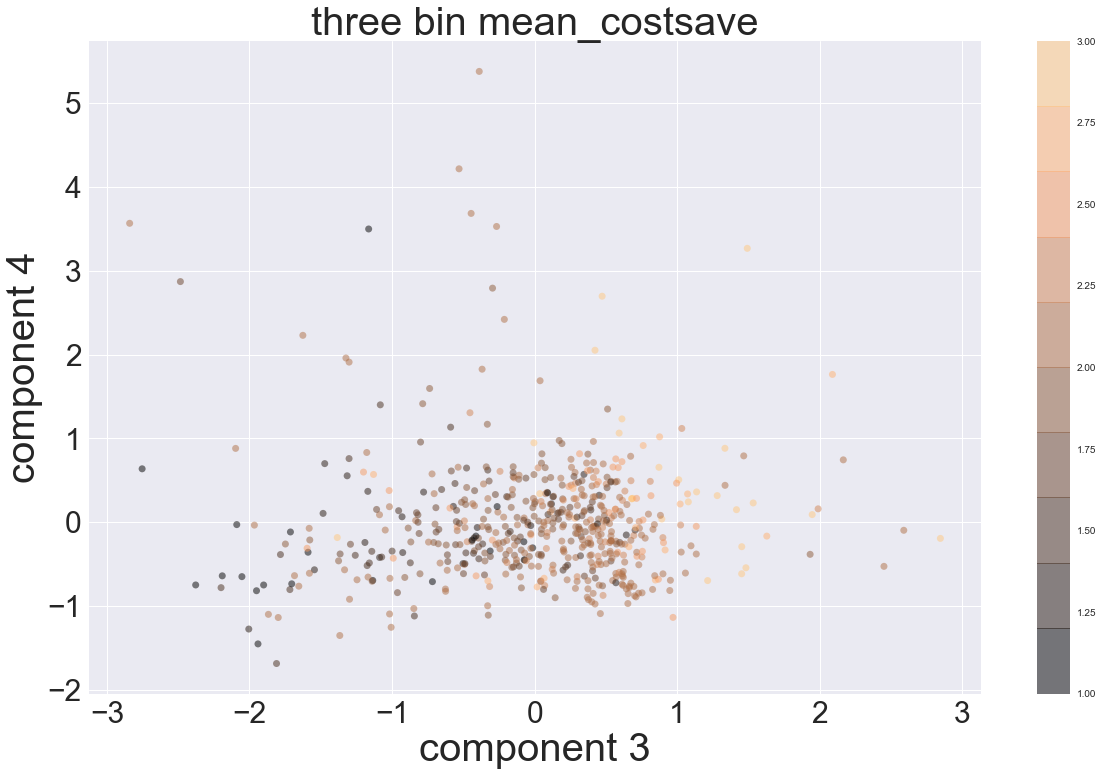

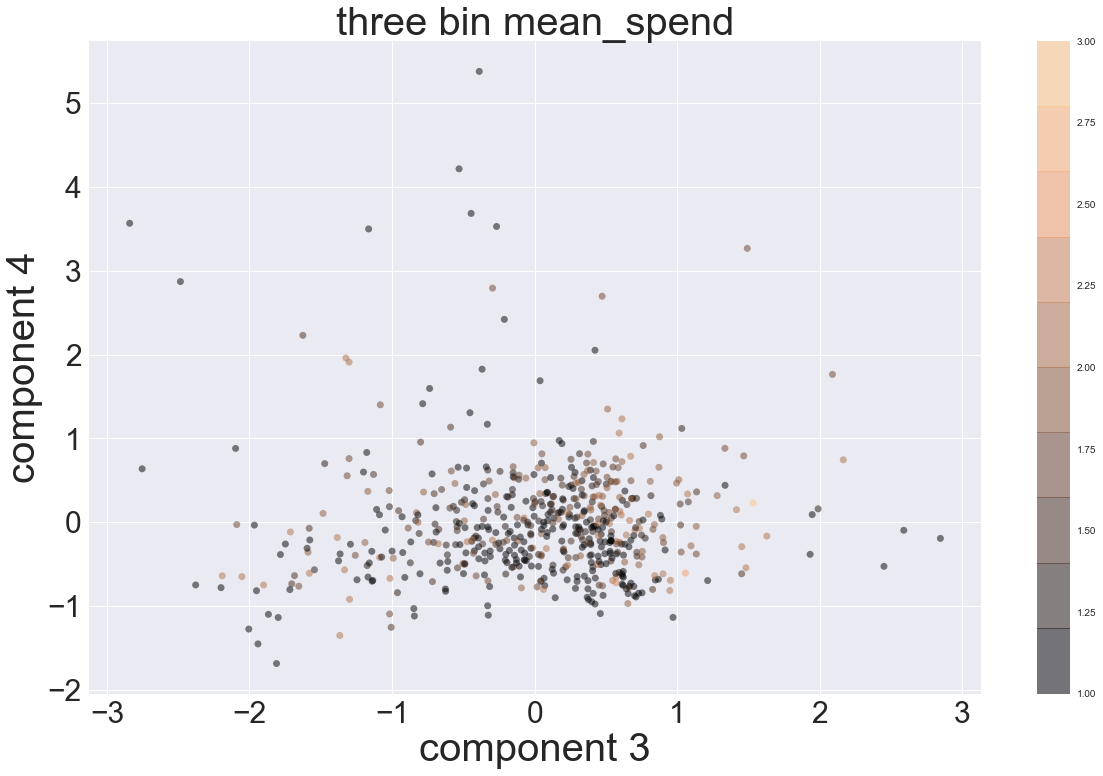

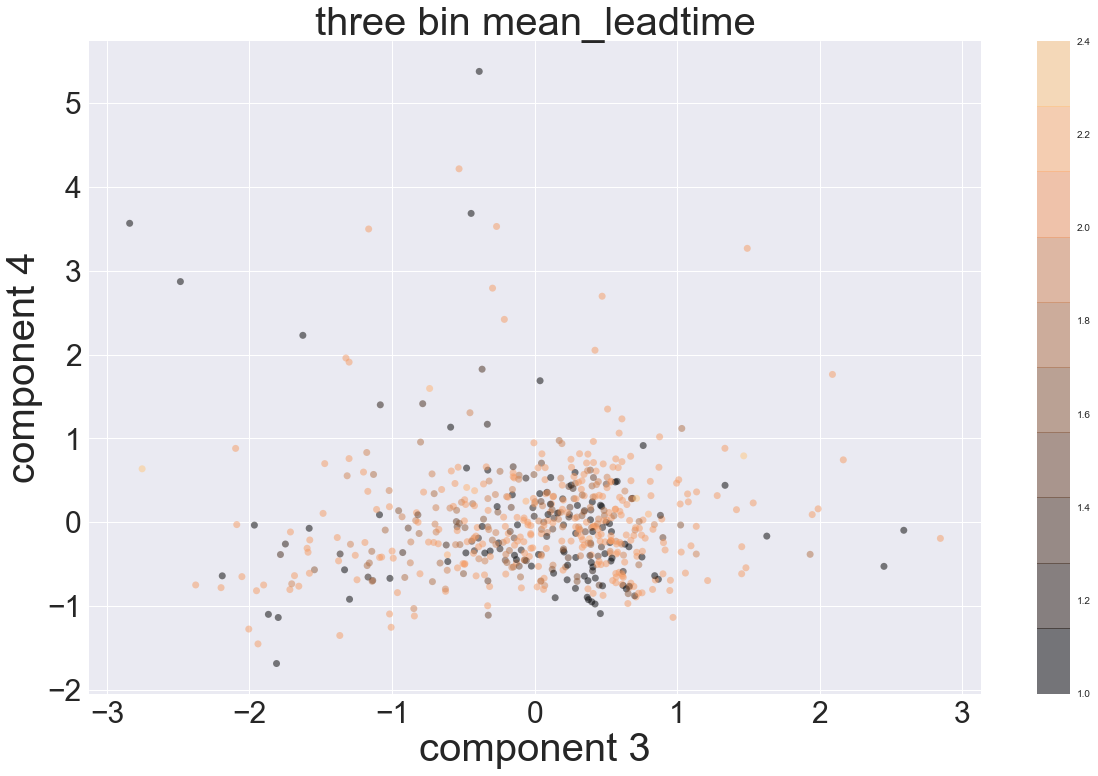

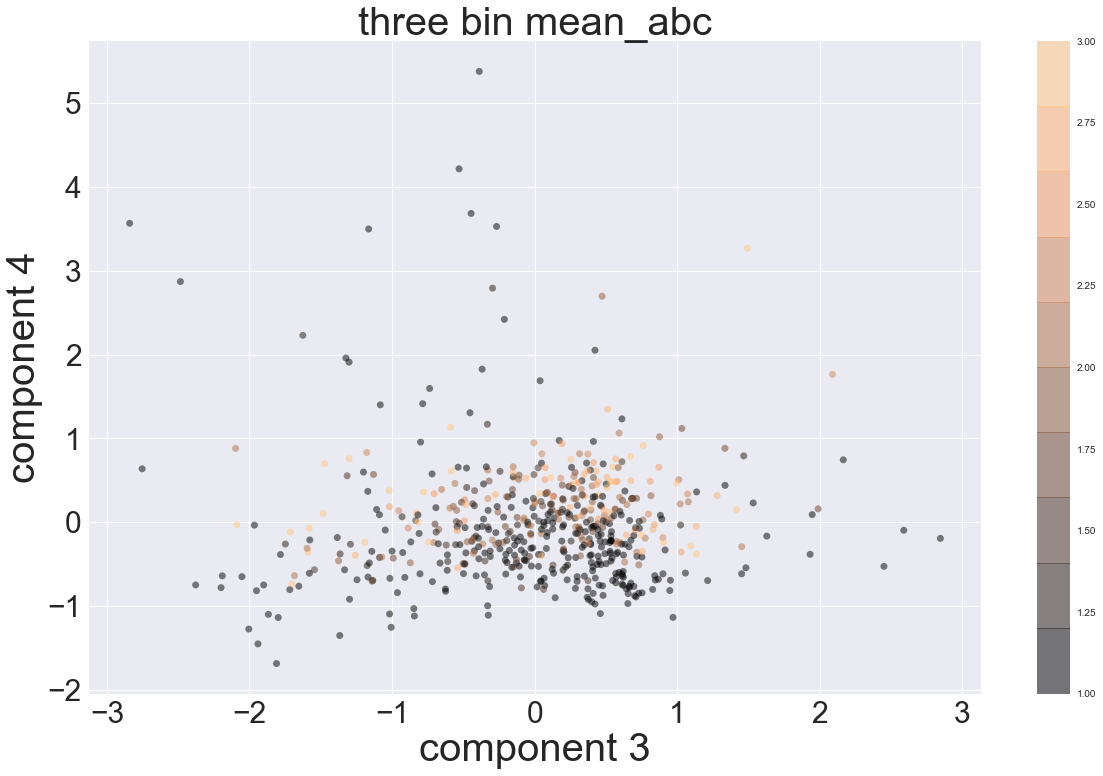

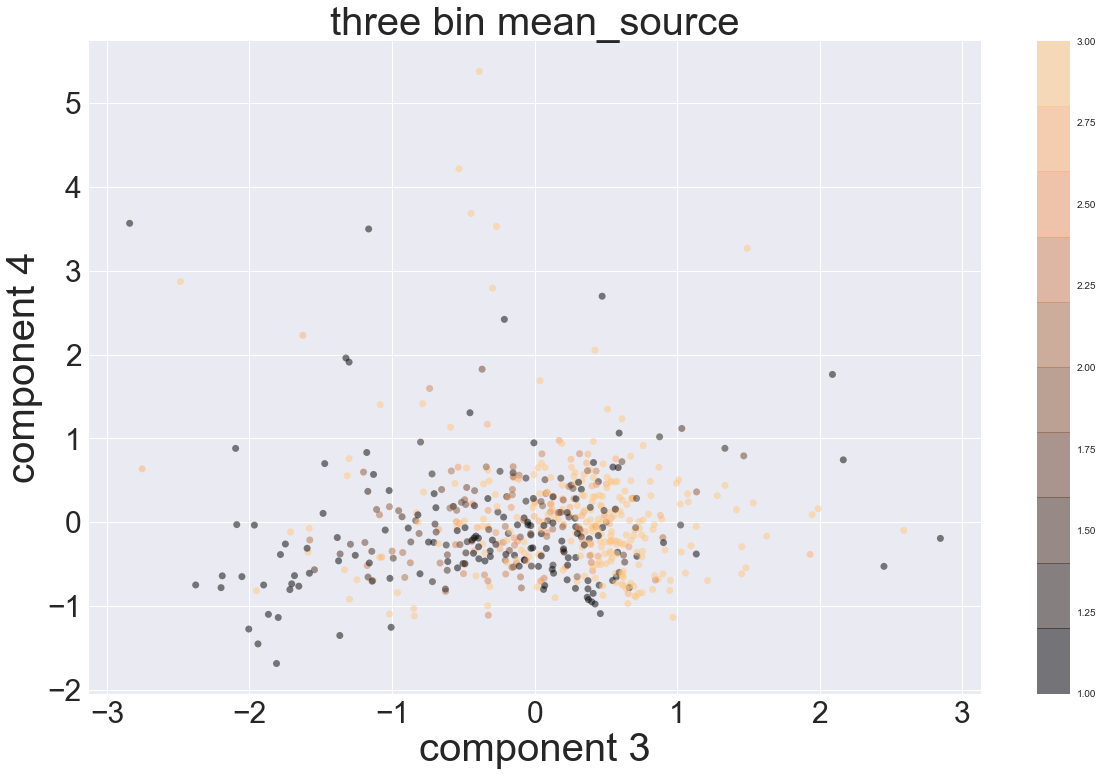

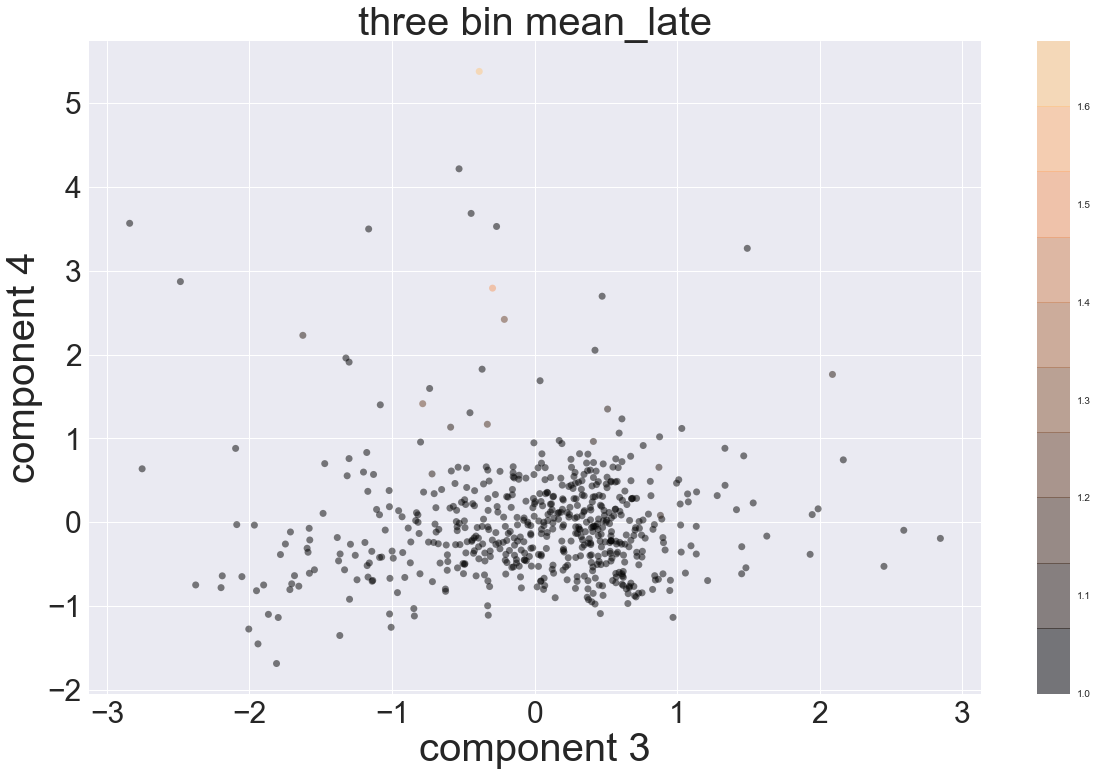

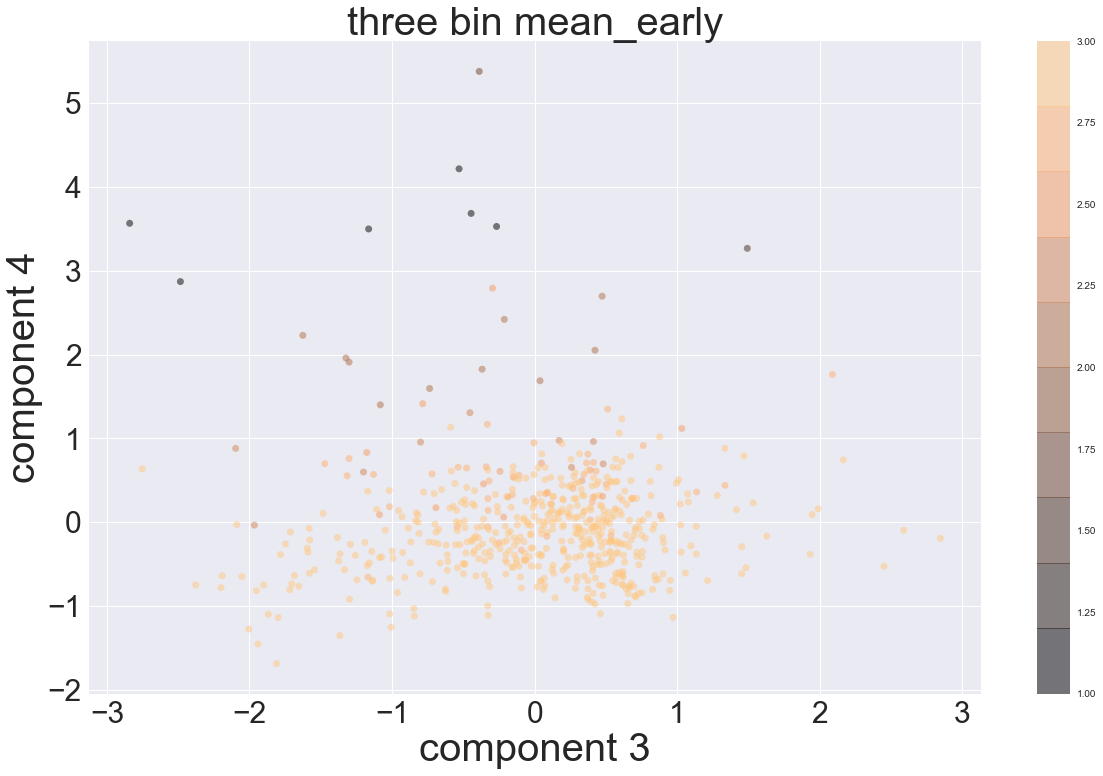

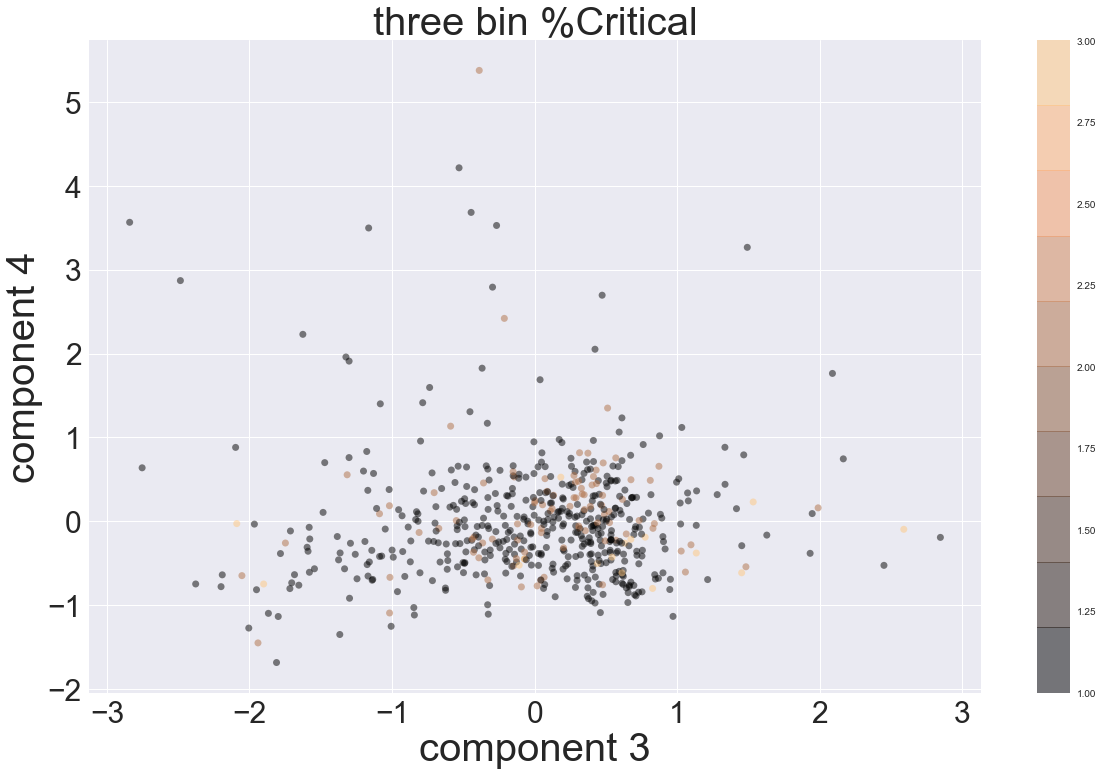

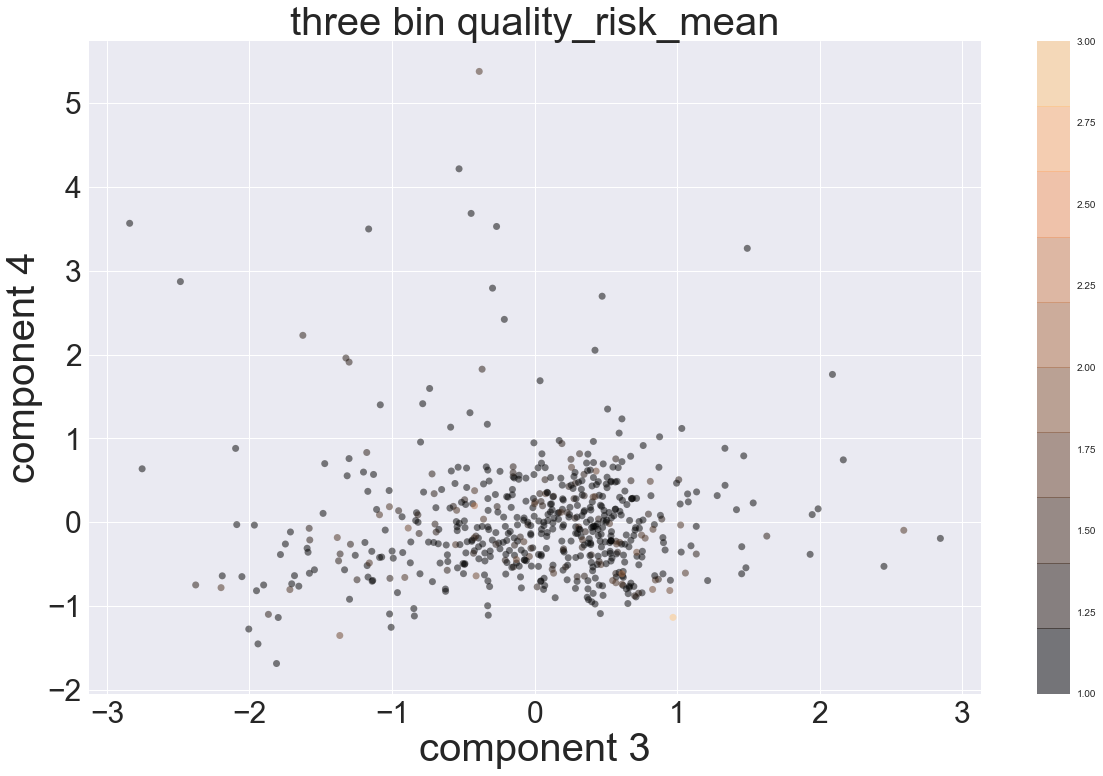

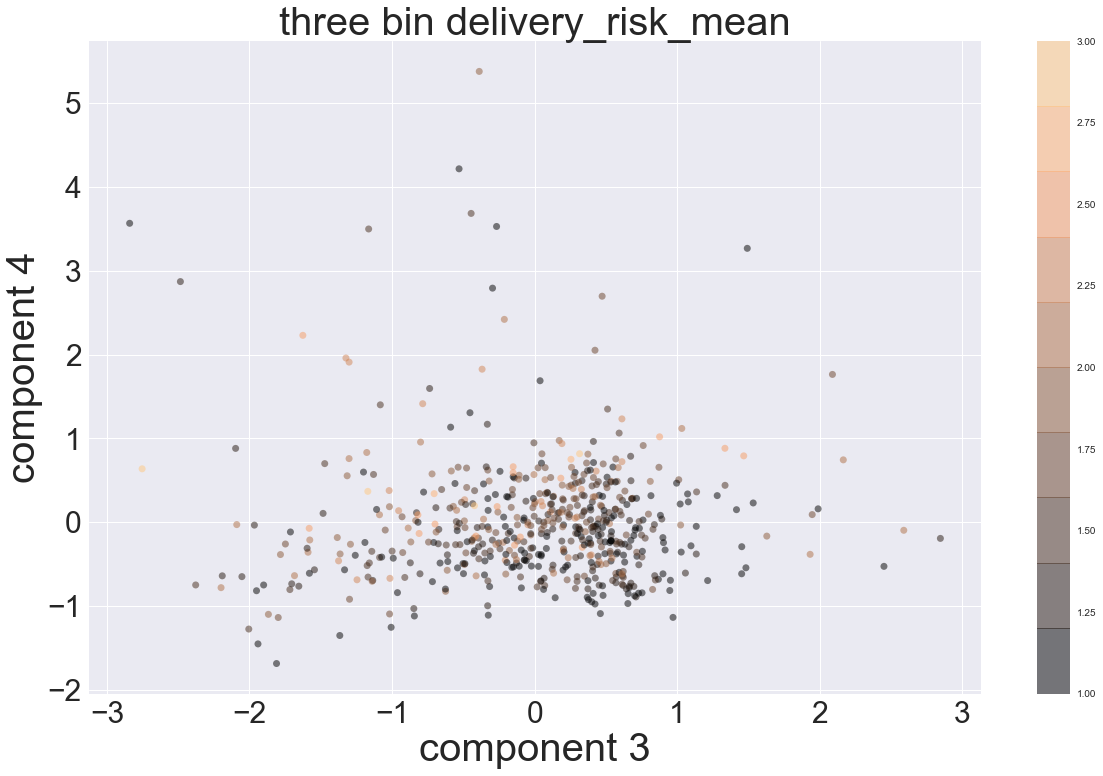

In [28]:
#plot the components against each feature
for feat in feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 2], projected[:, 3],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap='copper')
    plt.xlabel('component 3', fontsize=40)
    plt.ylabel('component 4', fontsize=40)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.tick_params(axis='both', which='minor', labelsize=30)
    plt.title(file+" bin "+feat, fontsize=40)
    plt.colorbar();
    fname = method+"_"+file+"_3_4_" + feat
    plt.savefig(fname)
    plt.show()

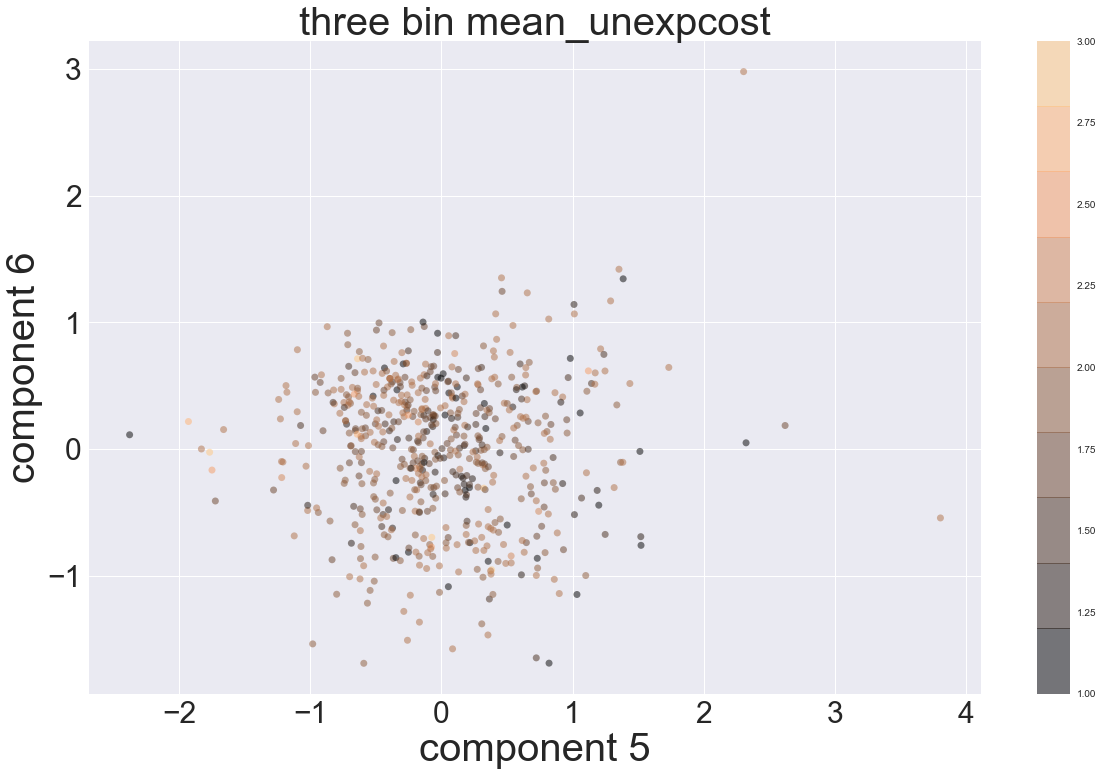

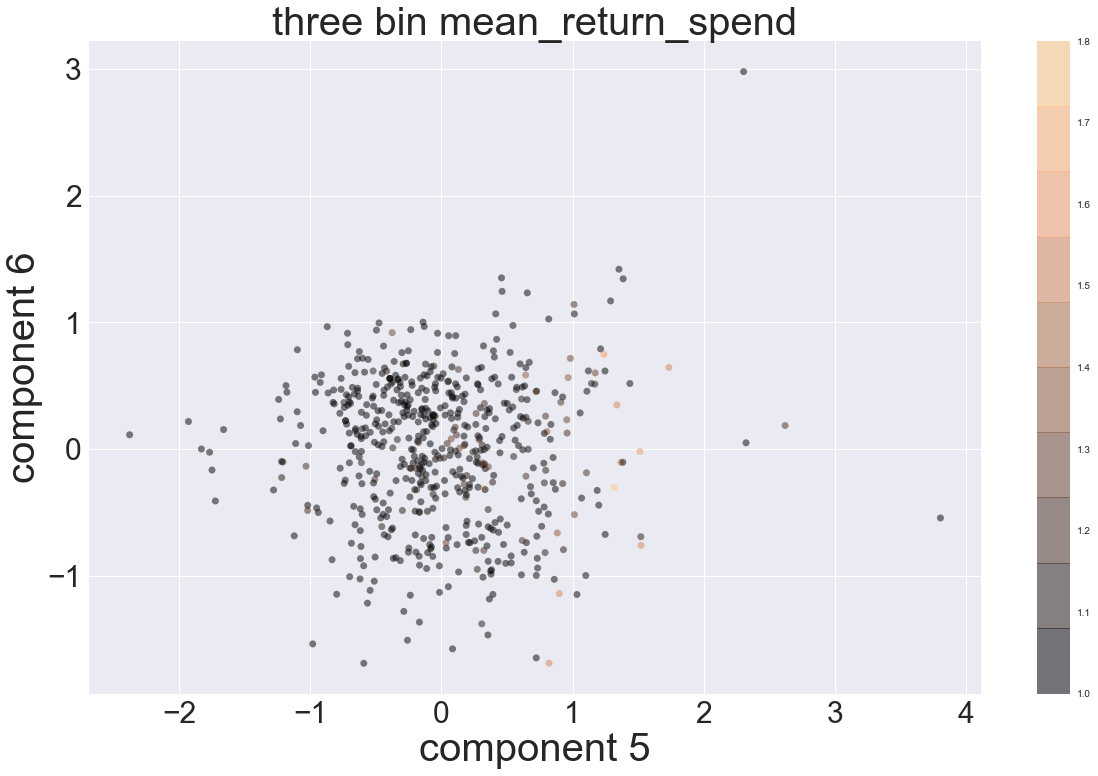

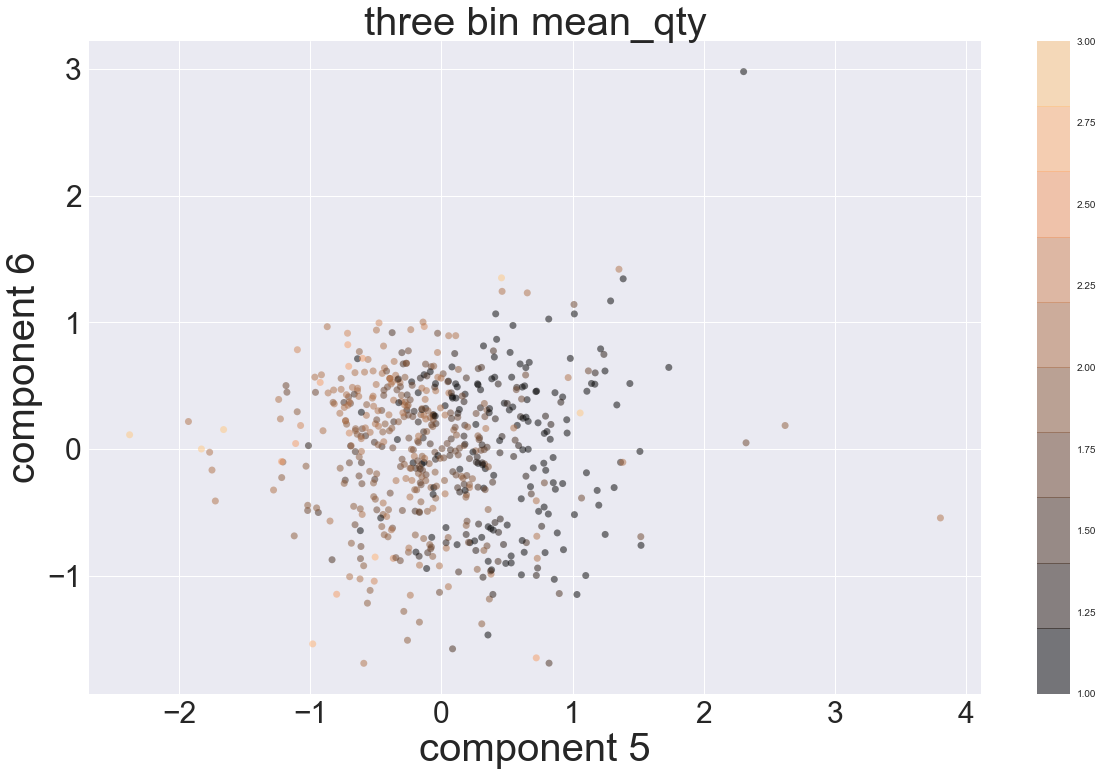

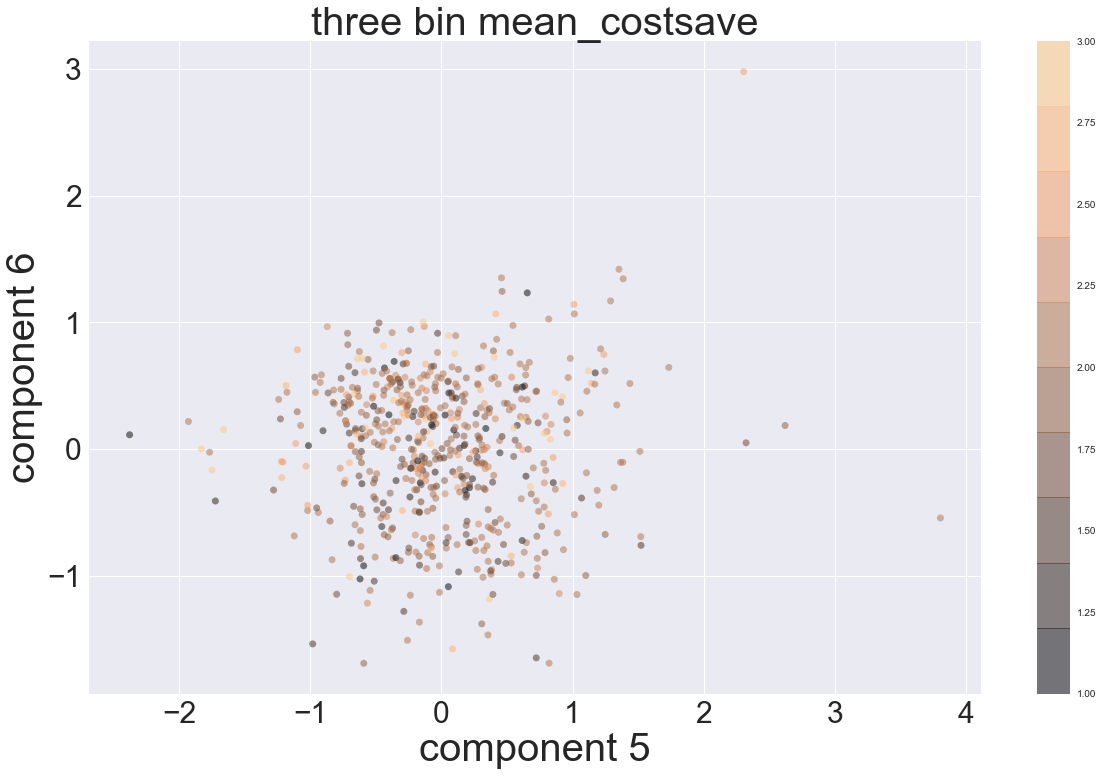

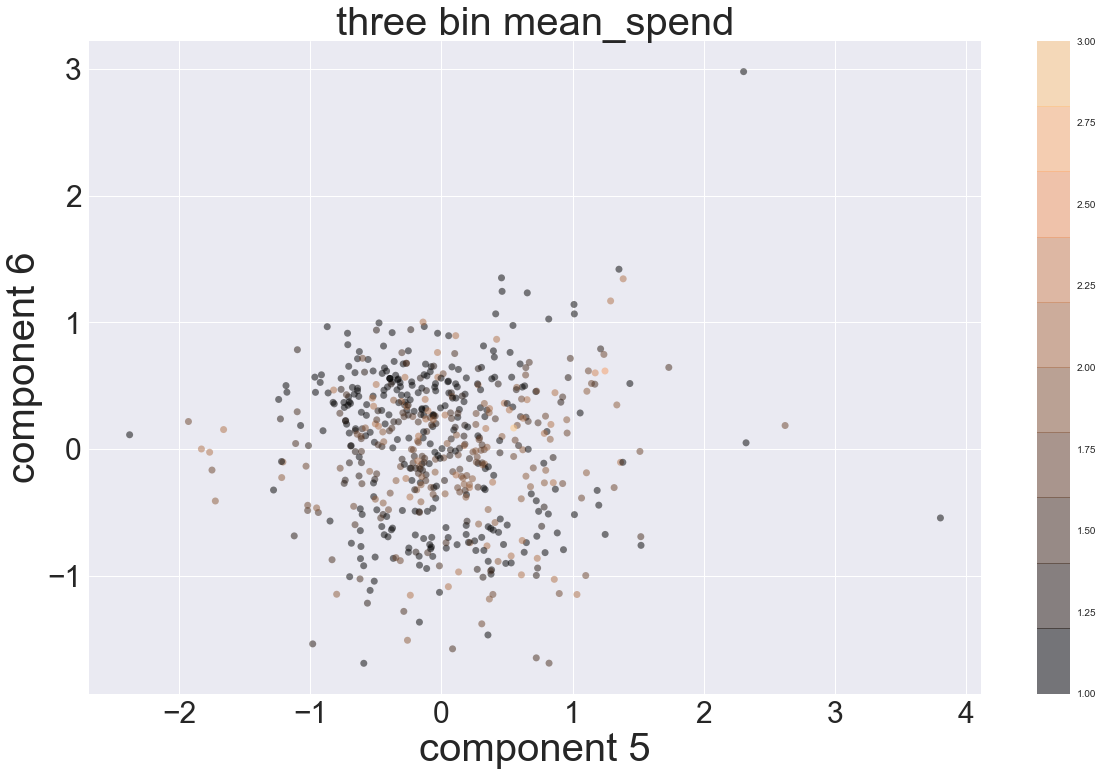

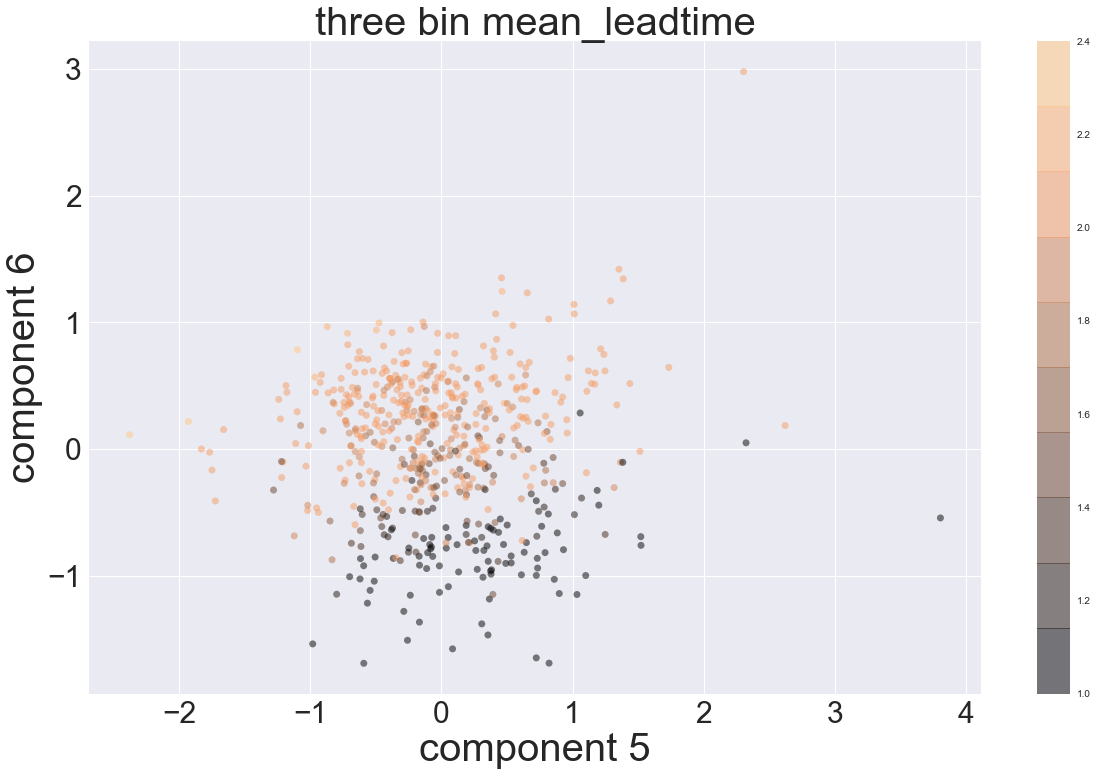

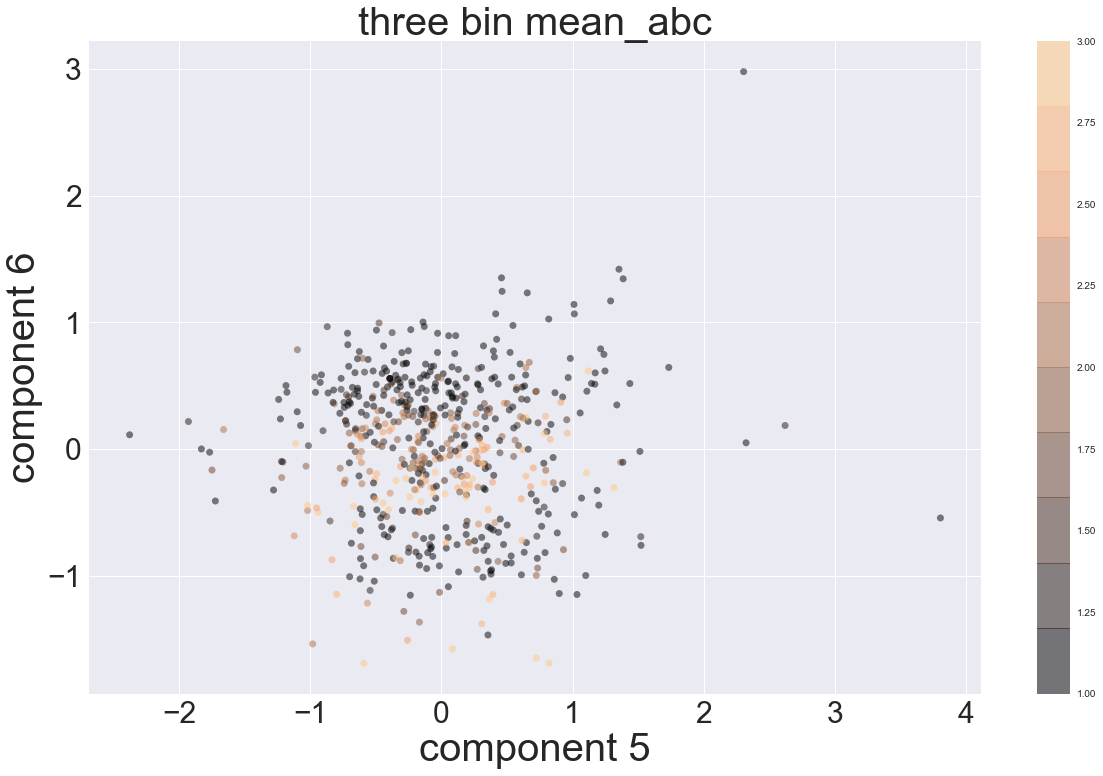

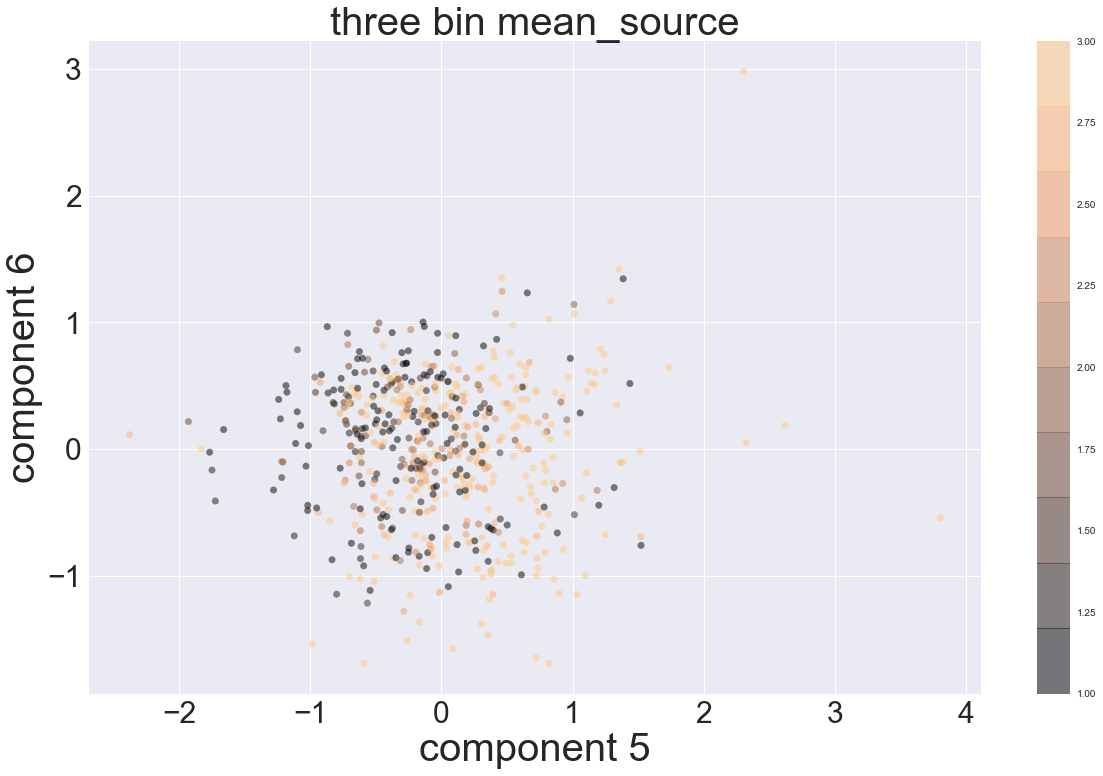

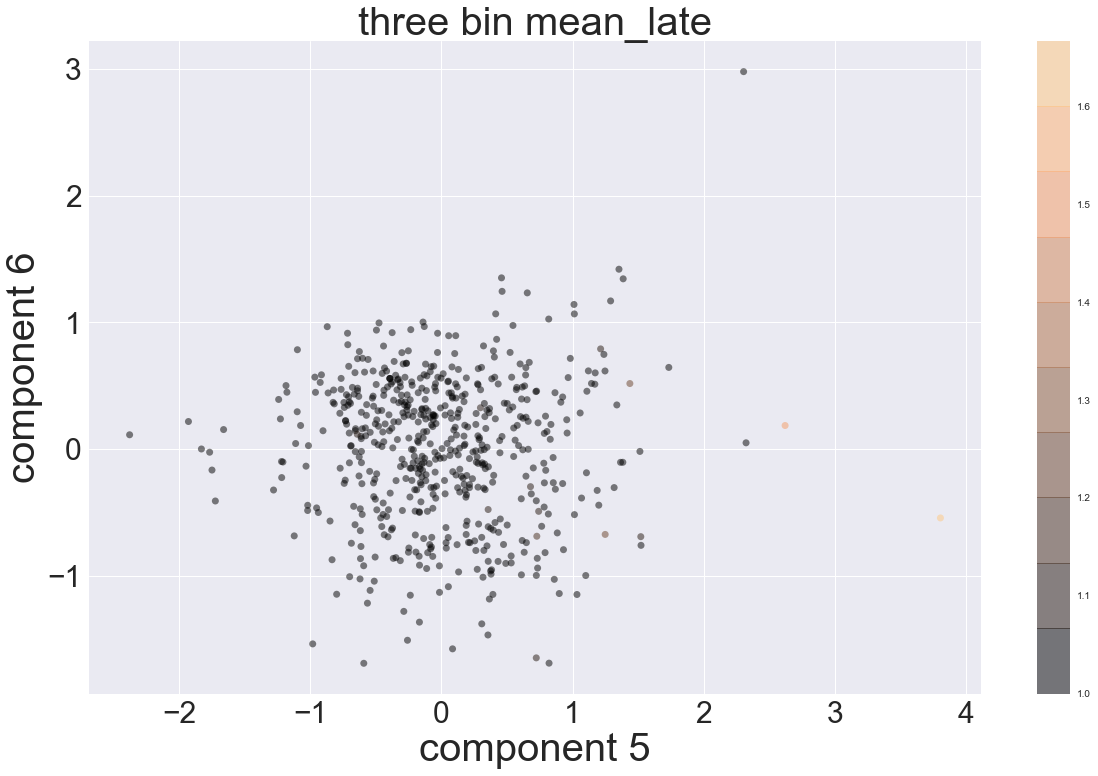

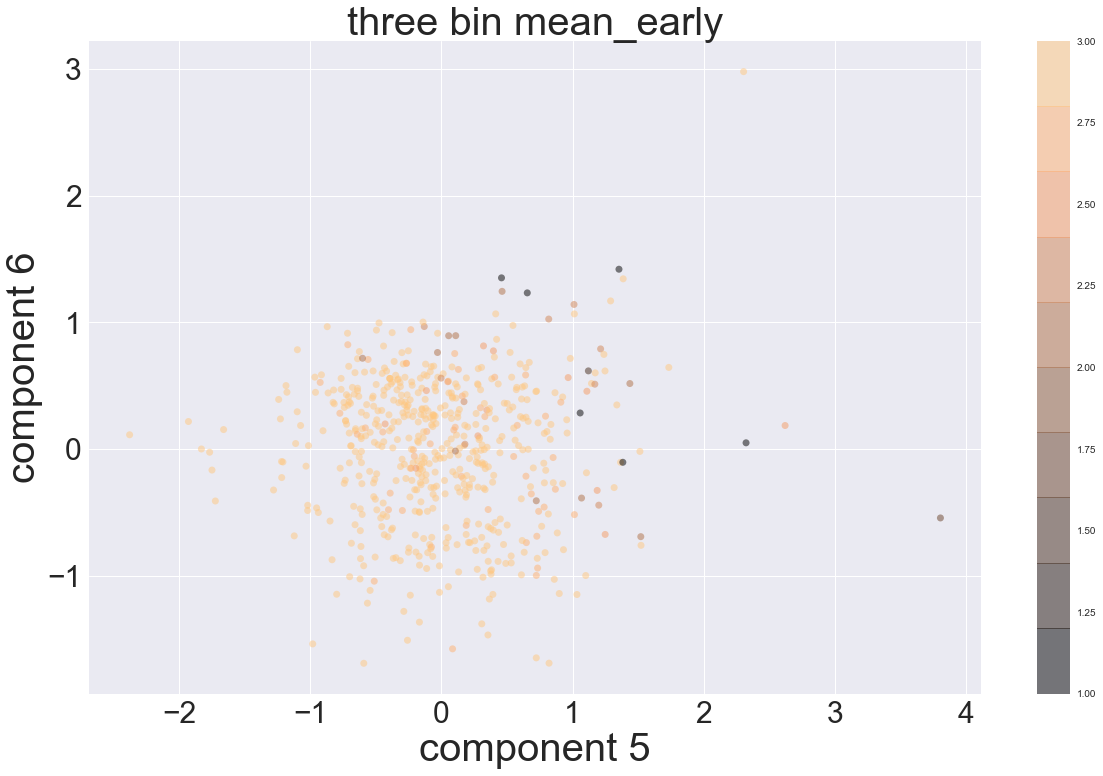

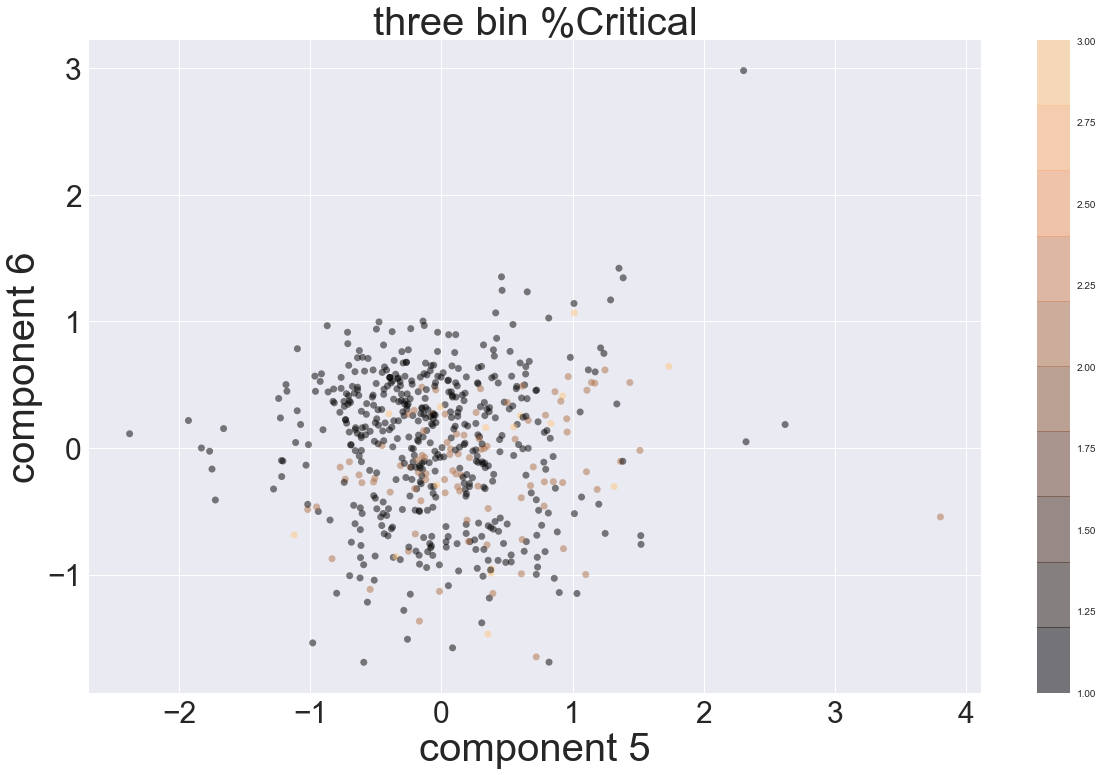

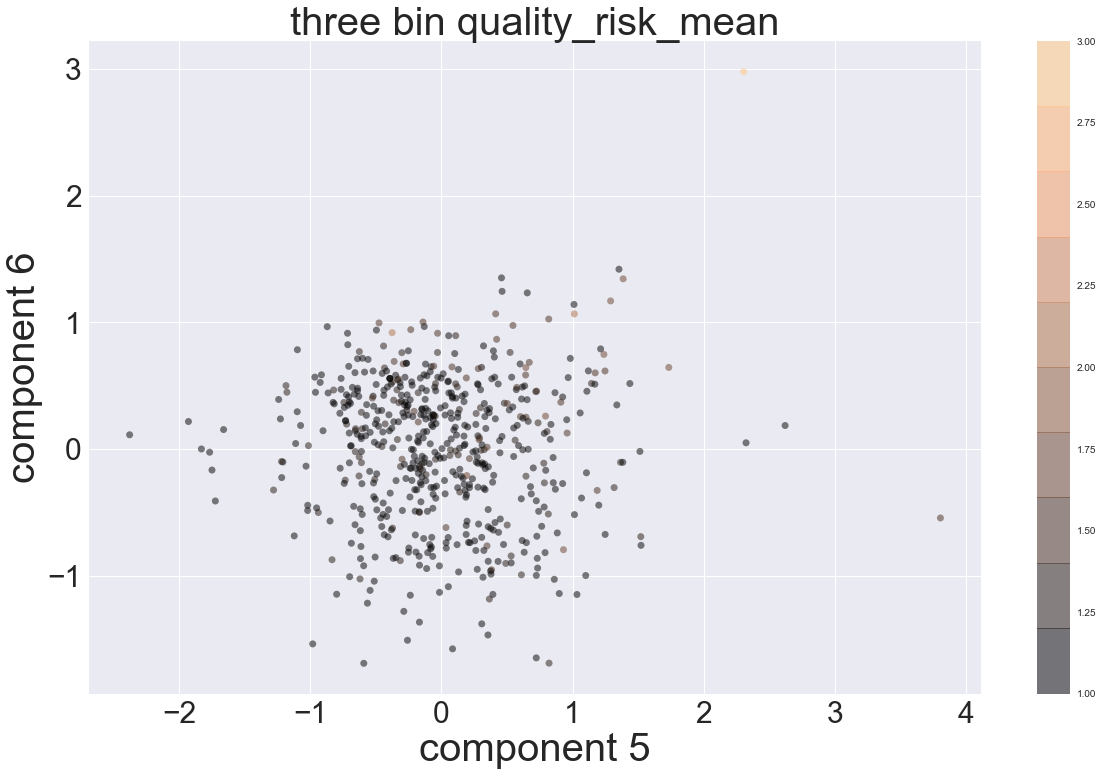

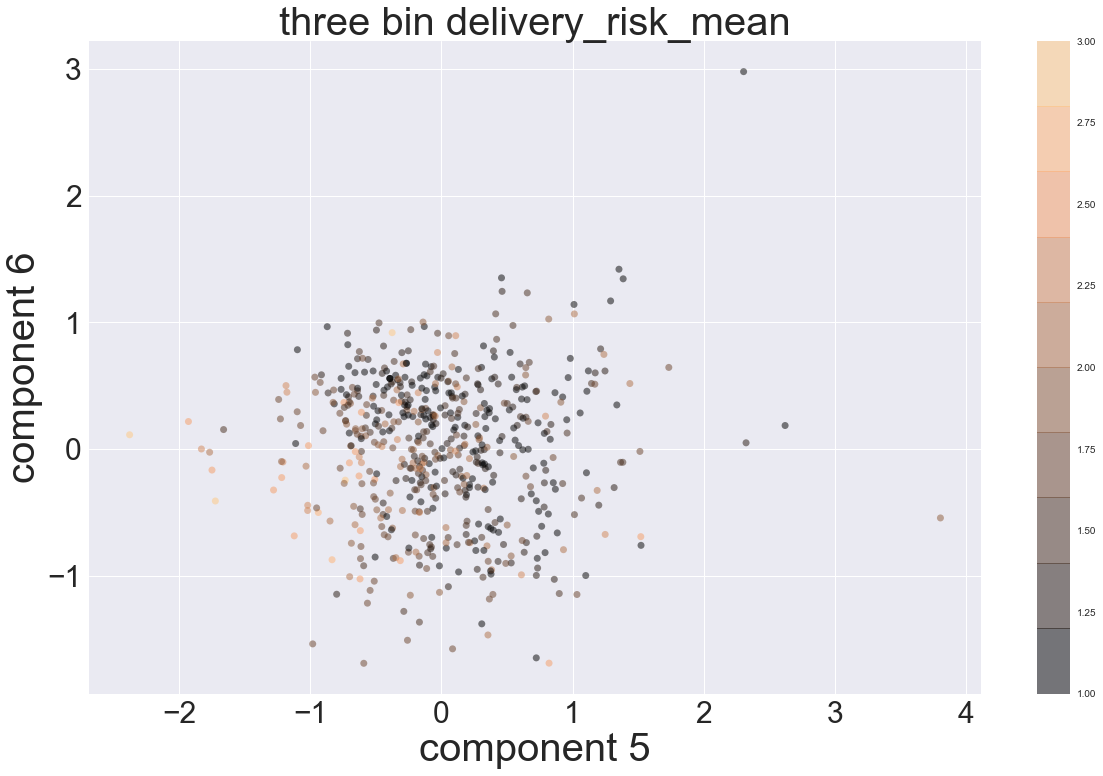

In [29]:
#plot the components against each feature
for feat in feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 4], projected[:, 5],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap='copper')
    plt.xlabel('component 5', fontsize=40)
    plt.ylabel('component 6', fontsize=40)
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.tick_params(axis='both', which='minor', labelsize=30)
    plt.title(file+" bin "+feat, fontsize=40)
    plt.colorbar();
    fname = method+"_"+file+"_5_6_" + feat
    plt.savefig(fname)
    plt.show()